In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, test_data, num_epochs, stats_interval,  layer, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)
    
    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)
    print(optimiser.eval_monitors(dataset=test_data,label='test'))
    
    # Plot the change in the validation and training set error over training.
    #fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k+'-->'+layer)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_title('Error')
    

    # Plot the change in the validation and training set accuracy over training.
    #fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k+'-->'+layer)
    ax_2.legend(loc=0)
    ax_2.set_title('Accuracy')
      
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

['inputs', 'targets']
['inputs', 'targets']
['inputs', 'targets']


HBox(children=(IntProgress(value=0, max=70), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 5.2s to complete
    error(train)=3.84e+00, acc(train)=3.79e-02, error(valid)=3.84e+00, acc(valid)=3.78e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 6.1s to complete
    error(train)=3.83e+00, acc(train)=7.49e-02, error(valid)=3.83e+00, acc(valid)=7.03e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 5.3s to complete
    error(train)=3.82e+00, acc(train)=1.09e-01, error(valid)=3.82e+00, acc(valid)=1.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 5.9s to complete
    error(train)=3.81e+00, acc(train)=1.21e-01, error(valid)=3.81e+00, acc(valid)=1.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 5.1s to complete
    error(train)=3.80e+00, acc(train)=1.51e-01, error(valid)=3.80e+00, acc(valid)=1.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 5.1s to complete
    error(train)=3.79e+00, acc(train)=1.79e-01, error(valid)=3.79e+00, acc(valid)=1.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 5.0s to complete
    error(train)=3.77e+00, acc(train)=2.00e-01, error(valid)=3.77e+00, acc(valid)=1.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 4.7s to complete
    error(train)=3.75e+00, acc(train)=2.18e-01, error(valid)=3.76e+00, acc(valid)=2.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 5.7s to complete
    error(train)=3.73e+00, acc(train)=2.13e-01, error(valid)=3.73e+00, acc(valid)=2.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 4.3s to complete
    error(train)=3.70e+00, acc(train)=2.24e-01, error(valid)=3.71e+00, acc(valid)=2.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 5.2s to complete
    error(train)=3.67e+00, acc(train)=2.37e-01, error(valid)=3.67e+00, acc(valid)=2.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 5.0s to complete
    error(train)=3.63e+00, acc(train)=2.48e-01, error(valid)=3.63e+00, acc(valid)=2.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 5.9s to complete
    error(train)=3.58e+00, acc(train)=2.44e-01, error(valid)=3.59e+00, acc(valid)=2.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 5.0s to complete
    error(train)=3.53e+00, acc(train)=2.45e-01, error(valid)=3.53e+00, acc(valid)=2.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 6.0s to complete
    error(train)=3.46e+00, acc(train)=2.51e-01, error(valid)=3.47e+00, acc(valid)=2.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 5.1s to complete
    error(train)=3.39e+00, acc(train)=2.60e-01, error(valid)=3.40e+00, acc(valid)=2.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 4.7s to complete
    error(train)=3.32e+00, acc(train)=2.68e-01, error(valid)=3.33e+00, acc(valid)=2.63e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 4.7s to complete
    error(train)=3.25e+00, acc(train)=2.75e-01, error(valid)=3.25e+00, acc(valid)=2.72e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 4.6s to complete
    error(train)=3.18e+00, acc(train)=2.86e-01, error(valid)=3.18e+00, acc(valid)=2.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 4.5s to complete
    error(train)=3.10e+00, acc(train)=2.97e-01, error(valid)=3.11e+00, acc(valid)=2.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 4.5s to complete
    error(train)=3.03e+00, acc(train)=3.07e-01, error(valid)=3.03e+00, acc(valid)=3.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 4.8s to complete
    error(train)=2.96e+00, acc(train)=3.18e-01, error(valid)=2.96e+00, acc(valid)=3.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 4.5s to complete
    error(train)=2.89e+00, acc(train)=3.29e-01, error(valid)=2.89e+00, acc(valid)=3.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 4.6s to complete
    error(train)=2.82e+00, acc(train)=3.39e-01, error(valid)=2.82e+00, acc(valid)=3.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 6.9s to complete
    error(train)=2.76e+00, acc(train)=3.51e-01, error(valid)=2.76e+00, acc(valid)=3.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 4.7s to complete
    error(train)=2.69e+00, acc(train)=3.60e-01, error(valid)=2.70e+00, acc(valid)=3.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 4.8s to complete
    error(train)=2.63e+00, acc(train)=3.71e-01, error(valid)=2.64e+00, acc(valid)=3.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 4.5s to complete
    error(train)=2.58e+00, acc(train)=3.78e-01, error(valid)=2.58e+00, acc(valid)=3.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.9s to complete
    error(train)=2.52e+00, acc(train)=3.88e-01, error(valid)=2.52e+00, acc(valid)=3.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 4.8s to complete
    error(train)=2.47e+00, acc(train)=4.00e-01, error(valid)=2.47e+00, acc(valid)=3.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 4.0s to complete
    error(train)=2.42e+00, acc(train)=4.09e-01, error(valid)=2.42e+00, acc(valid)=4.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 4.3s to complete
    error(train)=2.38e+00, acc(train)=4.18e-01, error(valid)=2.38e+00, acc(valid)=4.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 5.6s to complete
    error(train)=2.33e+00, acc(train)=4.24e-01, error(valid)=2.34e+00, acc(valid)=4.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 6.3s to complete
    error(train)=2.29e+00, acc(train)=4.32e-01, error(valid)=2.30e+00, acc(valid)=4.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.3s to complete
    error(train)=2.25e+00, acc(train)=4.41e-01, error(valid)=2.26e+00, acc(valid)=4.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 4.6s to complete
    error(train)=2.22e+00, acc(train)=4.48e-01, error(valid)=2.22e+00, acc(valid)=4.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 4.9s to complete
    error(train)=2.18e+00, acc(train)=4.54e-01, error(valid)=2.18e+00, acc(valid)=4.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 4.8s to complete
    error(train)=2.15e+00, acc(train)=4.63e-01, error(valid)=2.15e+00, acc(valid)=4.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 4.0s to complete
    error(train)=2.12e+00, acc(train)=4.70e-01, error(valid)=2.12e+00, acc(valid)=4.63e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 3.9s to complete
    error(train)=2.09e+00, acc(train)=4.76e-01, error(valid)=2.09e+00, acc(valid)=4.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 5.1s to complete
    error(train)=2.06e+00, acc(train)=4.81e-01, error(valid)=2.06e+00, acc(valid)=4.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 5.3s to complete
    error(train)=2.03e+00, acc(train)=4.86e-01, error(valid)=2.03e+00, acc(valid)=4.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 3.7s to complete
    error(train)=2.00e+00, acc(train)=4.92e-01, error(valid)=2.00e+00, acc(valid)=4.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 6.1s to complete
    error(train)=1.97e+00, acc(train)=4.98e-01, error(valid)=1.98e+00, acc(valid)=4.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 6.1s to complete
    error(train)=1.95e+00, acc(train)=5.02e-01, error(valid)=1.95e+00, acc(valid)=4.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 4.8s to complete
    error(train)=1.92e+00, acc(train)=5.07e-01, error(valid)=1.93e+00, acc(valid)=5.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 4.5s to complete
    error(train)=1.90e+00, acc(train)=5.14e-01, error(valid)=1.90e+00, acc(valid)=5.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 6.2s to complete
    error(train)=1.88e+00, acc(train)=5.18e-01, error(valid)=1.88e+00, acc(valid)=5.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 5.4s to complete
    error(train)=1.85e+00, acc(train)=5.22e-01, error(valid)=1.86e+00, acc(valid)=5.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 7.9s to complete
    error(train)=1.83e+00, acc(train)=5.27e-01, error(valid)=1.83e+00, acc(valid)=5.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 6.6s to complete
    error(train)=1.81e+00, acc(train)=5.30e-01, error(valid)=1.81e+00, acc(valid)=5.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 4.2s to complete
    error(train)=1.79e+00, acc(train)=5.35e-01, error(valid)=1.79e+00, acc(valid)=5.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 4.6s to complete
    error(train)=1.77e+00, acc(train)=5.39e-01, error(valid)=1.77e+00, acc(valid)=5.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 4.8s to complete
    error(train)=1.75e+00, acc(train)=5.43e-01, error(valid)=1.75e+00, acc(valid)=5.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 6.2s to complete
    error(train)=1.73e+00, acc(train)=5.46e-01, error(valid)=1.74e+00, acc(valid)=5.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 5.3s to complete
    error(train)=1.71e+00, acc(train)=5.50e-01, error(valid)=1.72e+00, acc(valid)=5.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 4.8s to complete
    error(train)=1.70e+00, acc(train)=5.53e-01, error(valid)=1.70e+00, acc(valid)=5.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 4.9s to complete
    error(train)=1.68e+00, acc(train)=5.57e-01, error(valid)=1.68e+00, acc(valid)=5.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 8.1s to complete
    error(train)=1.66e+00, acc(train)=5.60e-01, error(valid)=1.67e+00, acc(valid)=5.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 7.0s to complete
    error(train)=1.65e+00, acc(train)=5.62e-01, error(valid)=1.65e+00, acc(valid)=5.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 9.4s to complete
    error(train)=1.63e+00, acc(train)=5.66e-01, error(valid)=1.64e+00, acc(valid)=5.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 7.7s to complete
    error(train)=1.62e+00, acc(train)=5.68e-01, error(valid)=1.62e+00, acc(valid)=5.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 10.3s to complete
    error(train)=1.60e+00, acc(train)=5.71e-01, error(valid)=1.61e+00, acc(valid)=5.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 8.0s to complete
    error(train)=1.59e+00, acc(train)=5.74e-01, error(valid)=1.60e+00, acc(valid)=5.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 7.3s to complete
    error(train)=1.58e+00, acc(train)=5.77e-01, error(valid)=1.58e+00, acc(valid)=5.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 6.9s to complete
    error(train)=1.57e+00, acc(train)=5.79e-01, error(valid)=1.57e+00, acc(valid)=5.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 5.3s to complete
    error(train)=1.55e+00, acc(train)=5.81e-01, error(valid)=1.56e+00, acc(valid)=5.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 6.0s to complete
    error(train)=1.54e+00, acc(train)=5.84e-01, error(valid)=1.55e+00, acc(valid)=5.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 6.4s to complete
    error(train)=1.53e+00, acc(train)=5.87e-01, error(valid)=1.54e+00, acc(valid)=5.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 5.8s to complete
    error(train)=1.52e+00, acc(train)=5.89e-01, error(valid)=1.53e+00, acc(valid)=5.83e-01



OrderedDict([('errortest', 1.5415750761166747), ('acctest', 0.57481012658227848)])


HBox(children=(IntProgress(value=0, max=70), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 4.1s to complete
    error(train)=3.24e+00, acc(train)=2.44e-01, error(valid)=3.25e+00, acc(valid)=2.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 5.2s to complete
    error(train)=2.17e+00, acc(train)=4.64e-01, error(valid)=2.17e+00, acc(valid)=4.63e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 4.7s to complete
    error(train)=1.67e+00, acc(train)=5.57e-01, error(valid)=1.68e+00, acc(valid)=5.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 5.2s to complete
    error(train)=1.49e+00, acc(train)=5.93e-01, error(valid)=1.49e+00, acc(valid)=5.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 4.5s to complete
    error(train)=1.38e+00, acc(train)=6.20e-01, error(valid)=1.38e+00, acc(valid)=6.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.4s to complete
    error(train)=1.32e+00, acc(train)=6.35e-01, error(valid)=1.32e+00, acc(valid)=6.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 4.8s to complete
    error(train)=1.26e+00, acc(train)=6.49e-01, error(valid)=1.27e+00, acc(valid)=6.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 5.0s to complete
    error(train)=1.22e+00, acc(train)=6.60e-01, error(valid)=1.23e+00, acc(valid)=6.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 4.0s to complete
    error(train)=1.19e+00, acc(train)=6.68e-01, error(valid)=1.19e+00, acc(valid)=6.63e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 5.1s to complete
    error(train)=1.15e+00, acc(train)=6.76e-01, error(valid)=1.16e+00, acc(valid)=6.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 4.8s to complete
    error(train)=1.13e+00, acc(train)=6.82e-01, error(valid)=1.13e+00, acc(valid)=6.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 4.0s to complete
    error(train)=1.10e+00, acc(train)=6.89e-01, error(valid)=1.11e+00, acc(valid)=6.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 4.2s to complete
    error(train)=1.07e+00, acc(train)=6.97e-01, error(valid)=1.08e+00, acc(valid)=6.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 5.5s to complete
    error(train)=1.05e+00, acc(train)=7.03e-01, error(valid)=1.06e+00, acc(valid)=6.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 4.8s to complete
    error(train)=1.03e+00, acc(train)=7.09e-01, error(valid)=1.04e+00, acc(valid)=7.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 5.2s to complete
    error(train)=1.01e+00, acc(train)=7.13e-01, error(valid)=1.02e+00, acc(valid)=7.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 3.9s to complete
    error(train)=9.87e-01, acc(train)=7.18e-01, error(valid)=1.00e+00, acc(valid)=7.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 5.3s to complete
    error(train)=9.67e-01, acc(train)=7.24e-01, error(valid)=9.81e-01, acc(valid)=7.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 3.6s to complete
    error(train)=9.49e-01, acc(train)=7.28e-01, error(valid)=9.64e-01, acc(valid)=7.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 5.1s to complete
    error(train)=9.32e-01, acc(train)=7.32e-01, error(valid)=9.48e-01, acc(valid)=7.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 4.7s to complete
    error(train)=9.16e-01, acc(train)=7.36e-01, error(valid)=9.32e-01, acc(valid)=7.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.8s to complete
    error(train)=8.99e-01, acc(train)=7.41e-01, error(valid)=9.15e-01, acc(valid)=7.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 6.0s to complete
    error(train)=8.83e-01, acc(train)=7.44e-01, error(valid)=9.00e-01, acc(valid)=7.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 5.3s to complete
    error(train)=8.67e-01, acc(train)=7.49e-01, error(valid)=8.85e-01, acc(valid)=7.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 5.1s to complete
    error(train)=8.54e-01, acc(train)=7.52e-01, error(valid)=8.74e-01, acc(valid)=7.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 5.2s to complete
    error(train)=8.41e-01, acc(train)=7.56e-01, error(valid)=8.61e-01, acc(valid)=7.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 5.1s to complete
    error(train)=8.29e-01, acc(train)=7.59e-01, error(valid)=8.50e-01, acc(valid)=7.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 5.1s to complete
    error(train)=8.20e-01, acc(train)=7.59e-01, error(valid)=8.40e-01, acc(valid)=7.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 4.9s to complete
    error(train)=8.06e-01, acc(train)=7.64e-01, error(valid)=8.27e-01, acc(valid)=7.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 5.1s to complete
    error(train)=7.94e-01, acc(train)=7.67e-01, error(valid)=8.17e-01, acc(valid)=7.63e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 4.8s to complete
    error(train)=7.82e-01, acc(train)=7.70e-01, error(valid)=8.05e-01, acc(valid)=7.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 4.0s to complete
    error(train)=7.72e-01, acc(train)=7.72e-01, error(valid)=7.96e-01, acc(valid)=7.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 4.8s to complete
    error(train)=7.64e-01, acc(train)=7.74e-01, error(valid)=7.87e-01, acc(valid)=7.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 7.3s to complete
    error(train)=7.54e-01, acc(train)=7.77e-01, error(valid)=7.78e-01, acc(valid)=7.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.3s to complete
    error(train)=7.46e-01, acc(train)=7.79e-01, error(valid)=7.71e-01, acc(valid)=7.72e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 4.6s to complete
    error(train)=7.36e-01, acc(train)=7.81e-01, error(valid)=7.61e-01, acc(valid)=7.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 4.6s to complete
    error(train)=7.29e-01, acc(train)=7.83e-01, error(valid)=7.55e-01, acc(valid)=7.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 4.9s to complete
    error(train)=7.20e-01, acc(train)=7.85e-01, error(valid)=7.46e-01, acc(valid)=7.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 7.1s to complete
    error(train)=7.11e-01, acc(train)=7.88e-01, error(valid)=7.38e-01, acc(valid)=7.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 4.9s to complete
    error(train)=7.04e-01, acc(train)=7.89e-01, error(valid)=7.33e-01, acc(valid)=7.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 5.2s to complete
    error(train)=6.96e-01, acc(train)=7.92e-01, error(valid)=7.25e-01, acc(valid)=7.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 6.2s to complete
    error(train)=6.92e-01, acc(train)=7.92e-01, error(valid)=7.23e-01, acc(valid)=7.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 5.7s to complete
    error(train)=6.85e-01, acc(train)=7.94e-01, error(valid)=7.15e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 4.7s to complete
    error(train)=6.80e-01, acc(train)=7.94e-01, error(valid)=7.11e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 3.7s to complete
    error(train)=6.71e-01, acc(train)=7.97e-01, error(valid)=7.03e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 5.4s to complete
    error(train)=6.65e-01, acc(train)=7.99e-01, error(valid)=6.97e-01, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 6.4s to complete
    error(train)=6.60e-01, acc(train)=8.00e-01, error(valid)=6.92e-01, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 4.5s to complete
    error(train)=6.52e-01, acc(train)=8.02e-01, error(valid)=6.86e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 4.5s to complete
    error(train)=6.48e-01, acc(train)=8.02e-01, error(valid)=6.82e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 4.5s to complete
    error(train)=6.44e-01, acc(train)=8.05e-01, error(valid)=6.80e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 4.1s to complete
    error(train)=6.38e-01, acc(train)=8.05e-01, error(valid)=6.73e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 4.4s to complete
    error(train)=6.33e-01, acc(train)=8.06e-01, error(valid)=6.69e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 4.2s to complete
    error(train)=6.26e-01, acc(train)=8.09e-01, error(valid)=6.63e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 5.2s to complete
    error(train)=6.24e-01, acc(train)=8.09e-01, error(valid)=6.61e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 4.2s to complete
    error(train)=6.19e-01, acc(train)=8.10e-01, error(valid)=6.56e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 3.9s to complete
    error(train)=6.13e-01, acc(train)=8.13e-01, error(valid)=6.51e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 3.6s to complete
    error(train)=6.09e-01, acc(train)=8.13e-01, error(valid)=6.47e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 4.3s to complete
    error(train)=6.07e-01, acc(train)=8.13e-01, error(valid)=6.45e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 5.1s to complete
    error(train)=6.02e-01, acc(train)=8.15e-01, error(valid)=6.42e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 4.2s to complete
    error(train)=5.97e-01, acc(train)=8.16e-01, error(valid)=6.37e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 4.4s to complete
    error(train)=5.95e-01, acc(train)=8.16e-01, error(valid)=6.36e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 4.2s to complete
    error(train)=5.88e-01, acc(train)=8.19e-01, error(valid)=6.29e-01, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 3.6s to complete
    error(train)=5.85e-01, acc(train)=8.20e-01, error(valid)=6.28e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 4.3s to complete
    error(train)=5.81e-01, acc(train)=8.21e-01, error(valid)=6.24e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 3.4s to complete
    error(train)=5.78e-01, acc(train)=8.21e-01, error(valid)=6.22e-01, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 4.7s to complete
    error(train)=5.76e-01, acc(train)=8.22e-01, error(valid)=6.19e-01, acc(valid)=8.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 3.6s to complete
    error(train)=5.72e-01, acc(train)=8.22e-01, error(valid)=6.16e-01, acc(valid)=8.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 3.8s to complete
    error(train)=5.69e-01, acc(train)=8.23e-01, error(valid)=6.13e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 4.3s to complete
    error(train)=5.66e-01, acc(train)=8.23e-01, error(valid)=6.11e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 5.3s to complete
    error(train)=5.65e-01, acc(train)=8.23e-01, error(valid)=6.12e-01, acc(valid)=8.09e-01



OrderedDict([('errortest', 0.64044006127225139), ('acctest', 0.79905063291139244)])


HBox(children=(IntProgress(value=0, max=70), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 5.2s to complete
    error(train)=3.41e+00, acc(train)=1.90e-01, error(valid)=3.42e+00, acc(valid)=1.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 4.0s to complete
    error(train)=2.31e+00, acc(train)=4.50e-01, error(valid)=2.32e+00, acc(valid)=4.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 4.0s to complete
    error(train)=1.74e+00, acc(train)=5.40e-01, error(valid)=1.74e+00, acc(valid)=5.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 5.6s to complete
    error(train)=1.53e+00, acc(train)=5.81e-01, error(valid)=1.53e+00, acc(valid)=5.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 4.4s to complete
    error(train)=1.42e+00, acc(train)=6.05e-01, error(valid)=1.42e+00, acc(valid)=6.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 4.3s to complete
    error(train)=1.35e+00, acc(train)=6.22e-01, error(valid)=1.35e+00, acc(valid)=6.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 4.3s to complete
    error(train)=1.29e+00, acc(train)=6.42e-01, error(valid)=1.29e+00, acc(valid)=6.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 4.2s to complete
    error(train)=1.24e+00, acc(train)=6.53e-01, error(valid)=1.25e+00, acc(valid)=6.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 5.2s to complete
    error(train)=1.20e+00, acc(train)=6.63e-01, error(valid)=1.21e+00, acc(valid)=6.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 4.9s to complete
    error(train)=1.17e+00, acc(train)=6.73e-01, error(valid)=1.18e+00, acc(valid)=6.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 4.8s to complete
    error(train)=1.14e+00, acc(train)=6.81e-01, error(valid)=1.14e+00, acc(valid)=6.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 4.9s to complete
    error(train)=1.11e+00, acc(train)=6.85e-01, error(valid)=1.12e+00, acc(valid)=6.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 4.7s to complete
    error(train)=1.08e+00, acc(train)=6.95e-01, error(valid)=1.09e+00, acc(valid)=6.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 4.9s to complete
    error(train)=1.05e+00, acc(train)=7.01e-01, error(valid)=1.06e+00, acc(valid)=6.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 4.9s to complete
    error(train)=1.03e+00, acc(train)=7.07e-01, error(valid)=1.04e+00, acc(valid)=7.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 5.7s to complete
    error(train)=1.01e+00, acc(train)=7.14e-01, error(valid)=1.02e+00, acc(valid)=7.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 4.9s to complete
    error(train)=9.86e-01, acc(train)=7.17e-01, error(valid)=9.96e-01, acc(valid)=7.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 5.1s to complete
    error(train)=9.66e-01, acc(train)=7.23e-01, error(valid)=9.76e-01, acc(valid)=7.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 7.0s to complete
    error(train)=9.44e-01, acc(train)=7.29e-01, error(valid)=9.56e-01, acc(valid)=7.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 5.5s to complete
    error(train)=9.26e-01, acc(train)=7.33e-01, error(valid)=9.38e-01, acc(valid)=7.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 5.1s to complete
    error(train)=9.11e-01, acc(train)=7.37e-01, error(valid)=9.24e-01, acc(valid)=7.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 5.8s to complete
    error(train)=8.93e-01, acc(train)=7.41e-01, error(valid)=9.06e-01, acc(valid)=7.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 5.6s to complete
    error(train)=8.79e-01, acc(train)=7.45e-01, error(valid)=8.92e-01, acc(valid)=7.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 5.1s to complete
    error(train)=8.66e-01, acc(train)=7.48e-01, error(valid)=8.80e-01, acc(valid)=7.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 5.9s to complete
    error(train)=8.52e-01, acc(train)=7.52e-01, error(valid)=8.67e-01, acc(valid)=7.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 5.2s to complete
    error(train)=8.35e-01, acc(train)=7.56e-01, error(valid)=8.50e-01, acc(valid)=7.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 5.5s to complete
    error(train)=8.25e-01, acc(train)=7.58e-01, error(valid)=8.41e-01, acc(valid)=7.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 6.5s to complete
    error(train)=8.12e-01, acc(train)=7.62e-01, error(valid)=8.28e-01, acc(valid)=7.58e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 5.4s to complete
    error(train)=7.99e-01, acc(train)=7.66e-01, error(valid)=8.16e-01, acc(valid)=7.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 4.5s to complete
    error(train)=7.91e-01, acc(train)=7.67e-01, error(valid)=8.08e-01, acc(valid)=7.62e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 5.1s to complete
    error(train)=7.80e-01, acc(train)=7.70e-01, error(valid)=7.97e-01, acc(valid)=7.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 6.3s to complete
    error(train)=7.71e-01, acc(train)=7.73e-01, error(valid)=7.88e-01, acc(valid)=7.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 5.9s to complete
    error(train)=7.62e-01, acc(train)=7.75e-01, error(valid)=7.81e-01, acc(valid)=7.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 8.0s to complete
    error(train)=7.54e-01, acc(train)=7.78e-01, error(valid)=7.73e-01, acc(valid)=7.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 6.0s to complete
    error(train)=7.45e-01, acc(train)=7.79e-01, error(valid)=7.64e-01, acc(valid)=7.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 4.8s to complete
    error(train)=7.39e-01, acc(train)=7.80e-01, error(valid)=7.58e-01, acc(valid)=7.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 5.7s to complete
    error(train)=7.30e-01, acc(train)=7.83e-01, error(valid)=7.50e-01, acc(valid)=7.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 4.9s to complete
    error(train)=7.23e-01, acc(train)=7.84e-01, error(valid)=7.43e-01, acc(valid)=7.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 4.6s to complete
    error(train)=7.16e-01, acc(train)=7.85e-01, error(valid)=7.36e-01, acc(valid)=7.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 4.5s to complete
    error(train)=7.10e-01, acc(train)=7.88e-01, error(valid)=7.32e-01, acc(valid)=7.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 5.5s to complete
    error(train)=7.01e-01, acc(train)=7.90e-01, error(valid)=7.24e-01, acc(valid)=7.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 6.4s to complete
    error(train)=6.96e-01, acc(train)=7.92e-01, error(valid)=7.18e-01, acc(valid)=7.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 5.7s to complete
    error(train)=6.89e-01, acc(train)=7.92e-01, error(valid)=7.11e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 5.9s to complete
    error(train)=6.81e-01, acc(train)=7.96e-01, error(valid)=7.05e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 5.0s to complete
    error(train)=6.77e-01, acc(train)=7.97e-01, error(valid)=6.99e-01, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 5.7s to complete
    error(train)=6.73e-01, acc(train)=7.97e-01, error(valid)=6.98e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 5.6s to complete
    error(train)=6.66e-01, acc(train)=7.99e-01, error(valid)=6.92e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 5.6s to complete
    error(train)=6.61e-01, acc(train)=7.99e-01, error(valid)=6.87e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 5.2s to complete
    error(train)=6.56e-01, acc(train)=8.01e-01, error(valid)=6.84e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 7.2s to complete
    error(train)=6.52e-01, acc(train)=8.03e-01, error(valid)=6.78e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 6.4s to complete
    error(train)=6.44e-01, acc(train)=8.05e-01, error(valid)=6.72e-01, acc(valid)=7.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 6.3s to complete
    error(train)=6.41e-01, acc(train)=8.06e-01, error(valid)=6.70e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 9.4s to complete
    error(train)=6.37e-01, acc(train)=8.07e-01, error(valid)=6.66e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 4.7s to complete
    error(train)=6.30e-01, acc(train)=8.08e-01, error(valid)=6.60e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 5.1s to complete
    error(train)=6.27e-01, acc(train)=8.10e-01, error(valid)=6.57e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 6.2s to complete
    error(train)=6.22e-01, acc(train)=8.10e-01, error(valid)=6.53e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 7.4s to complete
    error(train)=6.18e-01, acc(train)=8.11e-01, error(valid)=6.50e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 6.1s to complete
    error(train)=6.16e-01, acc(train)=8.11e-01, error(valid)=6.48e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 7.6s to complete
    error(train)=6.11e-01, acc(train)=8.13e-01, error(valid)=6.44e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 5.1s to complete
    error(train)=6.08e-01, acc(train)=8.13e-01, error(valid)=6.40e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 8.5s to complete
    error(train)=6.04e-01, acc(train)=8.14e-01, error(valid)=6.37e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 6.4s to complete
    error(train)=5.98e-01, acc(train)=8.16e-01, error(valid)=6.32e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 4.6s to complete
    error(train)=5.94e-01, acc(train)=8.17e-01, error(valid)=6.30e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 4.3s to complete
    error(train)=5.97e-01, acc(train)=8.13e-01, error(valid)=6.33e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 5.7s to complete
    error(train)=5.88e-01, acc(train)=8.19e-01, error(valid)=6.23e-01, acc(valid)=8.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 4.6s to complete
    error(train)=5.85e-01, acc(train)=8.19e-01, error(valid)=6.22e-01, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 6.1s to complete
    error(train)=5.80e-01, acc(train)=8.21e-01, error(valid)=6.17e-01, acc(valid)=8.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 5.1s to complete
    error(train)=5.76e-01, acc(train)=8.22e-01, error(valid)=6.14e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 4.6s to complete
    error(train)=5.74e-01, acc(train)=8.23e-01, error(valid)=6.11e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 5.8s to complete
    error(train)=5.74e-01, acc(train)=8.22e-01, error(valid)=6.12e-01, acc(valid)=8.10e-01



OrderedDict([('errortest', 0.65117360970091698), ('acctest', 0.79386075949367096)])


HBox(children=(IntProgress(value=0, max=70), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 5.9s to complete
    error(train)=2.63e+00, acc(train)=3.88e-01, error(valid)=2.63e+00, acc(valid)=3.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 6.0s to complete
    error(train)=1.82e+00, acc(train)=5.36e-01, error(valid)=1.82e+00, acc(valid)=5.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 5.7s to complete
    error(train)=1.54e+00, acc(train)=5.86e-01, error(valid)=1.54e+00, acc(valid)=5.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 5.7s to complete
    error(train)=1.41e+00, acc(train)=6.11e-01, error(valid)=1.42e+00, acc(valid)=6.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 5.3s to complete
    error(train)=1.34e+00, acc(train)=6.29e-01, error(valid)=1.35e+00, acc(valid)=6.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 4.7s to complete
    error(train)=1.29e+00, acc(train)=6.40e-01, error(valid)=1.30e+00, acc(valid)=6.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 5.4s to complete
    error(train)=1.26e+00, acc(train)=6.51e-01, error(valid)=1.26e+00, acc(valid)=6.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 5.3s to complete
    error(train)=1.22e+00, acc(train)=6.60e-01, error(valid)=1.23e+00, acc(valid)=6.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 5.0s to complete
    error(train)=1.19e+00, acc(train)=6.67e-01, error(valid)=1.20e+00, acc(valid)=6.62e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 4.8s to complete
    error(train)=1.17e+00, acc(train)=6.73e-01, error(valid)=1.17e+00, acc(valid)=6.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 5.3s to complete
    error(train)=1.14e+00, acc(train)=6.81e-01, error(valid)=1.15e+00, acc(valid)=6.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 6.7s to complete
    error(train)=1.12e+00, acc(train)=6.86e-01, error(valid)=1.13e+00, acc(valid)=6.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 7.0s to complete
    error(train)=1.10e+00, acc(train)=6.92e-01, error(valid)=1.11e+00, acc(valid)=6.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 5.5s to complete
    error(train)=1.08e+00, acc(train)=6.97e-01, error(valid)=1.09e+00, acc(valid)=6.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 5.4s to complete
    error(train)=1.06e+00, acc(train)=7.01e-01, error(valid)=1.07e+00, acc(valid)=6.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 8.9s to complete
    error(train)=1.04e+00, acc(train)=7.07e-01, error(valid)=1.05e+00, acc(valid)=7.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 5.5s to complete
    error(train)=1.02e+00, acc(train)=7.13e-01, error(valid)=1.03e+00, acc(valid)=7.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 6.3s to complete
    error(train)=1.00e+00, acc(train)=7.16e-01, error(valid)=1.01e+00, acc(valid)=7.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 7.2s to complete
    error(train)=9.82e-01, acc(train)=7.21e-01, error(valid)=9.90e-01, acc(valid)=7.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 8.3s to complete
    error(train)=9.65e-01, acc(train)=7.26e-01, error(valid)=9.74e-01, acc(valid)=7.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 7.5s to complete
    error(train)=9.48e-01, acc(train)=7.30e-01, error(valid)=9.57e-01, acc(valid)=7.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 8.2s to complete
    error(train)=9.31e-01, acc(train)=7.34e-01, error(valid)=9.41e-01, acc(valid)=7.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 6.7s to complete
    error(train)=9.16e-01, acc(train)=7.38e-01, error(valid)=9.26e-01, acc(valid)=7.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 6.9s to complete
    error(train)=9.00e-01, acc(train)=7.40e-01, error(valid)=9.12e-01, acc(valid)=7.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 5.7s to complete
    error(train)=8.88e-01, acc(train)=7.45e-01, error(valid)=9.00e-01, acc(valid)=7.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 6.1s to complete
    error(train)=8.73e-01, acc(train)=7.49e-01, error(valid)=8.86e-01, acc(valid)=7.47e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 8.0s to complete
    error(train)=8.59e-01, acc(train)=7.52e-01, error(valid)=8.72e-01, acc(valid)=7.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 6.8s to complete
    error(train)=8.48e-01, acc(train)=7.54e-01, error(valid)=8.62e-01, acc(valid)=7.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 6.9s to complete
    error(train)=8.36e-01, acc(train)=7.57e-01, error(valid)=8.50e-01, acc(valid)=7.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 6.4s to complete
    error(train)=8.24e-01, acc(train)=7.60e-01, error(valid)=8.39e-01, acc(valid)=7.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 5.7s to complete
    error(train)=8.13e-01, acc(train)=7.63e-01, error(valid)=8.28e-01, acc(valid)=7.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 6.0s to complete
    error(train)=8.04e-01, acc(train)=7.65e-01, error(valid)=8.20e-01, acc(valid)=7.62e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 6.0s to complete
    error(train)=7.93e-01, acc(train)=7.67e-01, error(valid)=8.11e-01, acc(valid)=7.63e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 6.8s to complete
    error(train)=7.83e-01, acc(train)=7.71e-01, error(valid)=8.01e-01, acc(valid)=7.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 5.6s to complete
    error(train)=7.75e-01, acc(train)=7.73e-01, error(valid)=7.93e-01, acc(valid)=7.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 5.5s to complete
    error(train)=7.66e-01, acc(train)=7.74e-01, error(valid)=7.85e-01, acc(valid)=7.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 6.6s to complete
    error(train)=7.57e-01, acc(train)=7.76e-01, error(valid)=7.76e-01, acc(valid)=7.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 6.6s to complete
    error(train)=7.49e-01, acc(train)=7.79e-01, error(valid)=7.70e-01, acc(valid)=7.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 5.3s to complete
    error(train)=7.42e-01, acc(train)=7.80e-01, error(valid)=7.63e-01, acc(valid)=7.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 6.7s to complete
    error(train)=7.35e-01, acc(train)=7.82e-01, error(valid)=7.56e-01, acc(valid)=7.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 5.3s to complete
    error(train)=7.28e-01, acc(train)=7.84e-01, error(valid)=7.51e-01, acc(valid)=7.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 6.3s to complete
    error(train)=7.23e-01, acc(train)=7.84e-01, error(valid)=7.46e-01, acc(valid)=7.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 6.0s to complete
    error(train)=7.14e-01, acc(train)=7.87e-01, error(valid)=7.37e-01, acc(valid)=7.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 7.4s to complete
    error(train)=7.08e-01, acc(train)=7.89e-01, error(valid)=7.33e-01, acc(valid)=7.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 5.2s to complete
    error(train)=7.03e-01, acc(train)=7.90e-01, error(valid)=7.28e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 6.3s to complete
    error(train)=6.97e-01, acc(train)=7.91e-01, error(valid)=7.22e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 7.5s to complete
    error(train)=6.90e-01, acc(train)=7.93e-01, error(valid)=7.17e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 6.3s to complete
    error(train)=6.85e-01, acc(train)=7.95e-01, error(valid)=7.13e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 5.2s to complete
    error(train)=6.81e-01, acc(train)=7.95e-01, error(valid)=7.08e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 8.1s to complete
    error(train)=6.74e-01, acc(train)=7.96e-01, error(valid)=7.02e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 8.2s to complete
    error(train)=6.70e-01, acc(train)=7.98e-01, error(valid)=6.99e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 6.2s to complete
    error(train)=6.66e-01, acc(train)=7.99e-01, error(valid)=6.95e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 6.5s to complete
    error(train)=6.59e-01, acc(train)=8.01e-01, error(valid)=6.90e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 6.2s to complete
    error(train)=6.57e-01, acc(train)=8.01e-01, error(valid)=6.88e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 10.7s to complete
    error(train)=6.50e-01, acc(train)=8.04e-01, error(valid)=6.82e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 6.2s to complete
    error(train)=6.46e-01, acc(train)=8.05e-01, error(valid)=6.77e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 8.6s to complete
    error(train)=6.42e-01, acc(train)=8.04e-01, error(valid)=6.75e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 5.9s to complete
    error(train)=6.39e-01, acc(train)=8.05e-01, error(valid)=6.72e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 6.2s to complete
    error(train)=6.35e-01, acc(train)=8.07e-01, error(valid)=6.69e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 7.1s to complete
    error(train)=6.30e-01, acc(train)=8.08e-01, error(valid)=6.64e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 7.1s to complete
    error(train)=6.28e-01, acc(train)=8.08e-01, error(valid)=6.61e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 6.7s to complete
    error(train)=6.23e-01, acc(train)=8.10e-01, error(valid)=6.58e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 6.2s to complete
    error(train)=6.19e-01, acc(train)=8.11e-01, error(valid)=6.55e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 6.8s to complete
    error(train)=6.15e-01, acc(train)=8.11e-01, error(valid)=6.53e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 7.0s to complete
    error(train)=6.12e-01, acc(train)=8.12e-01, error(valid)=6.49e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 6.0s to complete
    error(train)=6.08e-01, acc(train)=8.14e-01, error(valid)=6.46e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 6.9s to complete
    error(train)=6.05e-01, acc(train)=8.14e-01, error(valid)=6.42e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 7.3s to complete
    error(train)=6.02e-01, acc(train)=8.16e-01, error(valid)=6.41e-01, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 8.4s to complete
    error(train)=6.00e-01, acc(train)=8.16e-01, error(valid)=6.39e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 6.3s to complete
    error(train)=5.96e-01, acc(train)=8.17e-01, error(valid)=6.36e-01, acc(valid)=8.06e-01



OrderedDict([('errortest', 0.66417954983784799), ('acctest', 0.79455696202531634)])


HBox(children=(IntProgress(value=0, max=70), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 6.9s to complete
    error(train)=2.03e+00, acc(train)=4.99e-01, error(valid)=2.03e+00, acc(valid)=4.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 8.0s to complete
    error(train)=1.58e+00, acc(train)=5.83e-01, error(valid)=1.58e+00, acc(valid)=5.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 7.0s to complete
    error(train)=1.41e+00, acc(train)=6.17e-01, error(valid)=1.41e+00, acc(valid)=6.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 7.3s to complete
    error(train)=1.32e+00, acc(train)=6.36e-01, error(valid)=1.33e+00, acc(valid)=6.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 6.4s to complete
    error(train)=1.27e+00, acc(train)=6.51e-01, error(valid)=1.27e+00, acc(valid)=6.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 6.1s to complete
    error(train)=1.22e+00, acc(train)=6.61e-01, error(valid)=1.23e+00, acc(valid)=6.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 5.9s to complete
    error(train)=1.19e+00, acc(train)=6.70e-01, error(valid)=1.20e+00, acc(valid)=6.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 6.7s to complete
    error(train)=1.16e+00, acc(train)=6.79e-01, error(valid)=1.17e+00, acc(valid)=6.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 7.2s to complete
    error(train)=1.13e+00, acc(train)=6.84e-01, error(valid)=1.14e+00, acc(valid)=6.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 5.8s to complete
    error(train)=1.11e+00, acc(train)=6.91e-01, error(valid)=1.12e+00, acc(valid)=6.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 7.3s to complete
    error(train)=1.08e+00, acc(train)=6.97e-01, error(valid)=1.10e+00, acc(valid)=6.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 6.4s to complete
    error(train)=1.06e+00, acc(train)=7.02e-01, error(valid)=1.08e+00, acc(valid)=6.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 6.1s to complete
    error(train)=1.04e+00, acc(train)=7.07e-01, error(valid)=1.06e+00, acc(valid)=7.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 6.1s to complete
    error(train)=1.02e+00, acc(train)=7.13e-01, error(valid)=1.04e+00, acc(valid)=7.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 5.8s to complete
    error(train)=1.00e+00, acc(train)=7.17e-01, error(valid)=1.02e+00, acc(valid)=7.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 6.2s to complete
    error(train)=9.86e-01, acc(train)=7.22e-01, error(valid)=1.00e+00, acc(valid)=7.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 10.5s to complete
    error(train)=9.68e-01, acc(train)=7.26e-01, error(valid)=9.86e-01, acc(valid)=7.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 10.6s to complete
    error(train)=9.52e-01, acc(train)=7.30e-01, error(valid)=9.70e-01, acc(valid)=7.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 7.8s to complete
    error(train)=9.35e-01, acc(train)=7.34e-01, error(valid)=9.54e-01, acc(valid)=7.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 7.8s to complete
    error(train)=9.19e-01, acc(train)=7.39e-01, error(valid)=9.39e-01, acc(valid)=7.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 10.1s to complete
    error(train)=9.05e-01, acc(train)=7.42e-01, error(valid)=9.25e-01, acc(valid)=7.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 5.9s to complete
    error(train)=8.90e-01, acc(train)=7.46e-01, error(valid)=9.11e-01, acc(valid)=7.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 5.9s to complete
    error(train)=8.75e-01, acc(train)=7.49e-01, error(valid)=8.97e-01, acc(valid)=7.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 6.1s to complete
    error(train)=8.63e-01, acc(train)=7.53e-01, error(valid)=8.85e-01, acc(valid)=7.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 7.5s to complete
    error(train)=8.50e-01, acc(train)=7.55e-01, error(valid)=8.73e-01, acc(valid)=7.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 5.9s to complete
    error(train)=8.37e-01, acc(train)=7.59e-01, error(valid)=8.60e-01, acc(valid)=7.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 7.4s to complete
    error(train)=8.25e-01, acc(train)=7.61e-01, error(valid)=8.49e-01, acc(valid)=7.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 6.9s to complete
    error(train)=8.14e-01, acc(train)=7.64e-01, error(valid)=8.39e-01, acc(valid)=7.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 5.4s to complete
    error(train)=8.03e-01, acc(train)=7.67e-01, error(valid)=8.28e-01, acc(valid)=7.58e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 5.9s to complete
    error(train)=7.93e-01, acc(train)=7.69e-01, error(valid)=8.18e-01, acc(valid)=7.60e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 5.3s to complete
    error(train)=7.84e-01, acc(train)=7.71e-01, error(valid)=8.10e-01, acc(valid)=7.63e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 5.9s to complete
    error(train)=7.74e-01, acc(train)=7.73e-01, error(valid)=8.00e-01, acc(valid)=7.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 6.8s to complete
    error(train)=7.64e-01, acc(train)=7.76e-01, error(valid)=7.91e-01, acc(valid)=7.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 6.0s to complete
    error(train)=7.55e-01, acc(train)=7.78e-01, error(valid)=7.83e-01, acc(valid)=7.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 7.6s to complete
    error(train)=7.46e-01, acc(train)=7.80e-01, error(valid)=7.74e-01, acc(valid)=7.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 8.0s to complete
    error(train)=7.38e-01, acc(train)=7.83e-01, error(valid)=7.67e-01, acc(valid)=7.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 8.2s to complete
    error(train)=7.30e-01, acc(train)=7.85e-01, error(valid)=7.59e-01, acc(valid)=7.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 9.3s to complete
    error(train)=7.23e-01, acc(train)=7.87e-01, error(valid)=7.53e-01, acc(valid)=7.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 7.2s to complete
    error(train)=7.15e-01, acc(train)=7.88e-01, error(valid)=7.45e-01, acc(valid)=7.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 6.8s to complete
    error(train)=7.08e-01, acc(train)=7.90e-01, error(valid)=7.39e-01, acc(valid)=7.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 5.9s to complete
    error(train)=7.01e-01, acc(train)=7.92e-01, error(valid)=7.32e-01, acc(valid)=7.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 7.4s to complete
    error(train)=6.95e-01, acc(train)=7.93e-01, error(valid)=7.26e-01, acc(valid)=7.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 5.6s to complete
    error(train)=6.88e-01, acc(train)=7.94e-01, error(valid)=7.21e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 6.0s to complete
    error(train)=6.82e-01, acc(train)=7.96e-01, error(valid)=7.15e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 6.1s to complete
    error(train)=6.75e-01, acc(train)=7.98e-01, error(valid)=7.09e-01, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 6.3s to complete
    error(train)=6.70e-01, acc(train)=7.98e-01, error(valid)=7.05e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 5.9s to complete
    error(train)=6.64e-01, acc(train)=8.01e-01, error(valid)=6.99e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 5.9s to complete
    error(train)=6.59e-01, acc(train)=8.02e-01, error(valid)=6.95e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 6.0s to complete
    error(train)=6.54e-01, acc(train)=8.03e-01, error(valid)=6.90e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 7.0s to complete
    error(train)=6.50e-01, acc(train)=8.03e-01, error(valid)=6.86e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 9.2s to complete
    error(train)=6.43e-01, acc(train)=8.05e-01, error(valid)=6.80e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 6.2s to complete
    error(train)=6.38e-01, acc(train)=8.07e-01, error(valid)=6.76e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 6.2s to complete
    error(train)=6.34e-01, acc(train)=8.08e-01, error(valid)=6.72e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 9.7s to complete
    error(train)=6.29e-01, acc(train)=8.09e-01, error(valid)=6.68e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 10.0s to complete
    error(train)=6.25e-01, acc(train)=8.10e-01, error(valid)=6.64e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 7.0s to complete
    error(train)=6.20e-01, acc(train)=8.11e-01, error(valid)=6.60e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 6.6s to complete
    error(train)=6.17e-01, acc(train)=8.12e-01, error(valid)=6.57e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 6.2s to complete
    error(train)=6.12e-01, acc(train)=8.13e-01, error(valid)=6.53e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 6.1s to complete
    error(train)=6.08e-01, acc(train)=8.14e-01, error(valid)=6.50e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 5.8s to complete
    error(train)=6.03e-01, acc(train)=8.16e-01, error(valid)=6.45e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 7.3s to complete
    error(train)=6.00e-01, acc(train)=8.17e-01, error(valid)=6.43e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 7.7s to complete
    error(train)=5.96e-01, acc(train)=8.17e-01, error(valid)=6.40e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 7.9s to complete
    error(train)=5.92e-01, acc(train)=8.18e-01, error(valid)=6.37e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 6.9s to complete
    error(train)=5.89e-01, acc(train)=8.19e-01, error(valid)=6.35e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 9.7s to complete
    error(train)=5.85e-01, acc(train)=8.20e-01, error(valid)=6.31e-01, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 6.5s to complete
    error(train)=5.81e-01, acc(train)=8.21e-01, error(valid)=6.29e-01, acc(valid)=8.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 6.5s to complete
    error(train)=5.78e-01, acc(train)=8.21e-01, error(valid)=6.26e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 8.9s to complete
    error(train)=5.75e-01, acc(train)=8.23e-01, error(valid)=6.24e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 6.5s to complete
    error(train)=5.72e-01, acc(train)=8.23e-01, error(valid)=6.21e-01, acc(valid)=8.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 6.5s to complete
    error(train)=5.68e-01, acc(train)=8.25e-01, error(valid)=6.17e-01, acc(valid)=8.11e-01



OrderedDict([('errortest', 0.65288704949314258), ('acctest', 0.7934177215189876)])
    final error(train) = 5.68e-01
    final error(valid) = 6.17e-01
    final acc(train)   = 8.25e-01
    final acc(valid)   = 8.11e-01
    run time per epoch = 10.65


FileNotFoundError: [Errno 2] No such file or directory: 'Error/Error_5-functions.pdf'

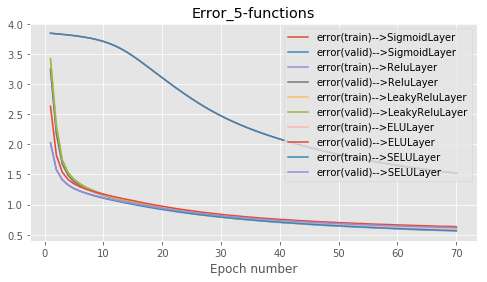

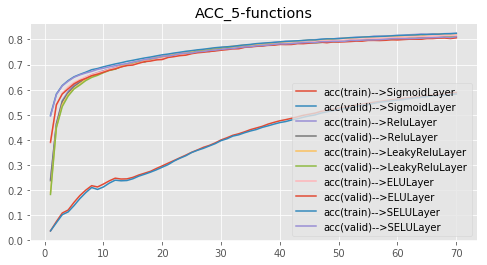

In [10]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.005
num_epochs = 70
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)



#SigmoidLayer()
SigmoidLayer = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
        SigmoidLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        SigmoidLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
# ReluLayer()
ReluLayer = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
#LeakyReluLayer()
LeakyReluLayer= MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        LeakyReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        LeakyReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
#ELULayer()
ELULayer = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ELULayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ELULayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
#SELULayer()
SELULayer = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        SELULayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        SELULayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate = learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
fig_1 = plt.figure(figsize=(8, 4))
fig_2 = plt.figure(figsize=(8, 4))

#Remember to use notebook=False when you write a script to be run in a terminal
stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    SigmoidLayer, error, learning_rule, train_data, valid_data, test_data, num_epochs, stats_interval, 'SigmoidLayer', notebook=True, color='c')


stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    ReluLayer, error, learning_rule, train_data, valid_data, test_data, num_epochs, stats_interval,  'ReluLayer',notebook=True, color='m')

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2= train_model_and_plot_stats(
    LeakyReluLayer, error, learning_rule, train_data, valid_data, test_data, num_epochs, stats_interval, 'LeakyReluLayer', notebook=True, color='b')

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2= train_model_and_plot_stats(
    ELULayer, error, learning_rule, train_data, valid_data, test_data, num_epochs, stats_interval, 'ELULayer', notebook=True, color='r')

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2= train_model_and_plot_stats(
    SELULayer, error, learning_rule, train_data, valid_data, test_data, num_epochs, stats_interval, 'SELULayer', notebook=True, color='y')


print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

fig_1.savefig('Error/Error_5-functions.pdf')

fig_2.savefig('ACC/ACC_5-functions.pdf')

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 3.7s to complete
    error(train)=2.24e+00, acc(train)=4.64e-01, error(valid)=2.24e+00, acc(valid)=4.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 3.4s to complete
    error(train)=1.51e+00, acc(train)=5.91e-01, error(valid)=1.51e+00, acc(valid)=5.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 3.0s to complete
    error(train)=1.33e+00, acc(train)=6.30e-01, error(valid)=1.33e+00, acc(valid)=6.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 3.6s to complete
    error(train)=1.22e+00, acc(train)=6.58e-01, error(valid)=1.23e+00, acc(valid)=6.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 4.0s to complete
    error(train)=1.15e+00, acc(train)=6.79e-01, error(valid)=1.16e+00, acc(valid)=6.72e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 6.1s to complete
    error(train)=1.09e+00, acc(train)=6.90e-01, error(valid)=1.10e+00, acc(valid)=6.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 6.2s to complete
    error(train)=1.04e+00, acc(train)=7.04e-01, error(valid)=1.05e+00, acc(valid)=7.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 5.0s to complete
    error(train)=9.92e-01, acc(train)=7.17e-01, error(valid)=1.00e+00, acc(valid)=7.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 3.5s to complete
    error(train)=9.54e-01, acc(train)=7.26e-01, error(valid)=9.70e-01, acc(valid)=7.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 3.7s to complete
    error(train)=9.17e-01, acc(train)=7.36e-01, error(valid)=9.33e-01, acc(valid)=7.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 3.4s to complete
    error(train)=8.87e-01, acc(train)=7.43e-01, error(valid)=9.03e-01, acc(valid)=7.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 3.5s to complete
    error(train)=8.60e-01, acc(train)=7.50e-01, error(valid)=8.77e-01, acc(valid)=7.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 3.8s to complete
    error(train)=8.32e-01, acc(train)=7.56e-01, error(valid)=8.51e-01, acc(valid)=7.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 3.2s to complete
    error(train)=8.12e-01, acc(train)=7.62e-01, error(valid)=8.32e-01, acc(valid)=7.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 3.7s to complete
    error(train)=7.84e-01, acc(train)=7.69e-01, error(valid)=8.07e-01, acc(valid)=7.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 4.3s to complete
    error(train)=7.68e-01, acc(train)=7.74e-01, error(valid)=7.90e-01, acc(valid)=7.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 4.0s to complete
    error(train)=7.49e-01, acc(train)=7.77e-01, error(valid)=7.72e-01, acc(valid)=7.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 3.0s to complete
    error(train)=7.30e-01, acc(train)=7.83e-01, error(valid)=7.54e-01, acc(valid)=7.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 3.6s to complete
    error(train)=7.15e-01, acc(train)=7.86e-01, error(valid)=7.41e-01, acc(valid)=7.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 3.6s to complete
    error(train)=7.00e-01, acc(train)=7.91e-01, error(valid)=7.29e-01, acc(valid)=7.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.9s to complete
    error(train)=6.89e-01, acc(train)=7.91e-01, error(valid)=7.19e-01, acc(valid)=7.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.4s to complete
    error(train)=6.74e-01, acc(train)=7.96e-01, error(valid)=7.05e-01, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 3.9s to complete
    error(train)=6.65e-01, acc(train)=7.97e-01, error(valid)=6.95e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 3.5s to complete
    error(train)=6.57e-01, acc(train)=7.98e-01, error(valid)=6.89e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 3.5s to complete
    error(train)=6.40e-01, acc(train)=8.06e-01, error(valid)=6.75e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 3.7s to complete
    error(train)=6.31e-01, acc(train)=8.07e-01, error(valid)=6.67e-01, acc(valid)=7.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 4.1s to complete
    error(train)=6.22e-01, acc(train)=8.10e-01, error(valid)=6.59e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 3.4s to complete
    error(train)=6.15e-01, acc(train)=8.12e-01, error(valid)=6.51e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 4.1s to complete
    error(train)=6.07e-01, acc(train)=8.14e-01, error(valid)=6.47e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.8s to complete
    error(train)=5.95e-01, acc(train)=8.17e-01, error(valid)=6.35e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 5.1s to complete
    error(train)=5.87e-01, acc(train)=8.19e-01, error(valid)=6.30e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 4.2s to complete
    error(train)=5.83e-01, acc(train)=8.19e-01, error(valid)=6.26e-01, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 5.5s to complete
    error(train)=5.76e-01, acc(train)=8.20e-01, error(valid)=6.20e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 4.4s to complete
    error(train)=5.69e-01, acc(train)=8.23e-01, error(valid)=6.16e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.0s to complete
    error(train)=5.64e-01, acc(train)=8.24e-01, error(valid)=6.12e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 3.7s to complete
    error(train)=5.57e-01, acc(train)=8.26e-01, error(valid)=6.06e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 3.4s to complete
    error(train)=5.51e-01, acc(train)=8.29e-01, error(valid)=6.02e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 3.2s to complete
    error(train)=5.46e-01, acc(train)=8.28e-01, error(valid)=5.99e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 3.3s to complete
    error(train)=5.42e-01, acc(train)=8.30e-01, error(valid)=5.95e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 3.9s to complete
    error(train)=5.34e-01, acc(train)=8.32e-01, error(valid)=5.89e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 7.0s to complete
    error(train)=5.31e-01, acc(train)=8.33e-01, error(valid)=5.86e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 3.7s to complete
    error(train)=5.29e-01, acc(train)=8.33e-01, error(valid)=5.88e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 3.8s to complete
    error(train)=5.20e-01, acc(train)=8.36e-01, error(valid)=5.77e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 4.7s to complete
    error(train)=5.17e-01, acc(train)=8.36e-01, error(valid)=5.79e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 3.7s to complete
    error(train)=5.15e-01, acc(train)=8.37e-01, error(valid)=5.76e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 3.8s to complete
    error(train)=5.16e-01, acc(train)=8.33e-01, error(valid)=5.81e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 3.4s to complete
    error(train)=5.02e-01, acc(train)=8.41e-01, error(valid)=5.67e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 4.1s to complete
    error(train)=4.99e-01, acc(train)=8.42e-01, error(valid)=5.65e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 3.2s to complete
    error(train)=4.96e-01, acc(train)=8.42e-01, error(valid)=5.64e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 3.8s to complete
    error(train)=4.94e-01, acc(train)=8.42e-01, error(valid)=5.63e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 5.7s to complete
    error(train)=4.91e-01, acc(train)=8.42e-01, error(valid)=5.61e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 4.1s to complete
    error(train)=4.85e-01, acc(train)=8.46e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 4.1s to complete
    error(train)=4.83e-01, acc(train)=8.46e-01, error(valid)=5.55e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 3.9s to complete
    error(train)=4.81e-01, acc(train)=8.47e-01, error(valid)=5.55e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 3.7s to complete
    error(train)=4.76e-01, acc(train)=8.46e-01, error(valid)=5.51e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 3.1s to complete
    error(train)=4.72e-01, acc(train)=8.49e-01, error(valid)=5.50e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 3.7s to complete
    error(train)=4.69e-01, acc(train)=8.49e-01, error(valid)=5.46e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 3.4s to complete
    error(train)=4.68e-01, acc(train)=8.48e-01, error(valid)=5.49e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 3.7s to complete
    error(train)=4.68e-01, acc(train)=8.49e-01, error(valid)=5.50e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 4.7s to complete
    error(train)=4.62e-01, acc(train)=8.51e-01, error(valid)=5.43e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 3.8s to complete
    error(train)=4.58e-01, acc(train)=8.52e-01, error(valid)=5.41e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 3.7s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=5.44e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 3.6s to complete
    error(train)=4.54e-01, acc(train)=8.52e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 3.9s to complete
    error(train)=4.53e-01, acc(train)=8.53e-01, error(valid)=5.41e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 3.3s to complete
    error(train)=4.51e-01, acc(train)=8.53e-01, error(valid)=5.39e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 4.3s to complete
    error(train)=4.48e-01, acc(train)=8.53e-01, error(valid)=5.37e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 4.4s to complete
    error(train)=4.47e-01, acc(train)=8.55e-01, error(valid)=5.37e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 3.4s to complete
    error(train)=4.43e-01, acc(train)=8.56e-01, error(valid)=5.35e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 3.1s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.33e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 3.6s to complete
    error(train)=4.39e-01, acc(train)=8.56e-01, error(valid)=5.34e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 4.0s to complete
    error(train)=4.34e-01, acc(train)=8.58e-01, error(valid)=5.29e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 4.9s to complete
    error(train)=4.35e-01, acc(train)=8.57e-01, error(valid)=5.32e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 3.6s to complete
    error(train)=4.35e-01, acc(train)=8.56e-01, error(valid)=5.33e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 5.5s to complete
    error(train)=4.26e-01, acc(train)=8.61e-01, error(valid)=5.25e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 4.9s to complete
    error(train)=4.28e-01, acc(train)=8.60e-01, error(valid)=5.28e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 4.7s to complete
    error(train)=4.22e-01, acc(train)=8.61e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 4.5s to complete
    error(train)=4.21e-01, acc(train)=8.61e-01, error(valid)=5.25e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 3.8s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.25e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 3.7s to complete
    error(train)=4.17e-01, acc(train)=8.62e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 4.4s to complete
    error(train)=4.14e-01, acc(train)=8.64e-01, error(valid)=5.21e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 4.4s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.24e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 3.5s to complete
    error(train)=4.13e-01, acc(train)=8.64e-01, error(valid)=5.22e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 4.4s to complete
    error(train)=4.11e-01, acc(train)=8.64e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 4.4s to complete
    error(train)=4.13e-01, acc(train)=8.62e-01, error(valid)=5.26e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 4.4s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 4.6s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.21e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 4.4s to complete
    error(train)=4.07e-01, acc(train)=8.65e-01, error(valid)=5.23e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 4.0s to complete
    error(train)=4.01e-01, acc(train)=8.67e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 3.6s to complete
    error(train)=3.98e-01, acc(train)=8.68e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 3.6s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 3.8s to complete
    error(train)=3.99e-01, acc(train)=8.67e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 4.1s to complete
    error(train)=3.99e-01, acc(train)=8.68e-01, error(valid)=5.19e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 4.6s to complete
    error(train)=3.93e-01, acc(train)=8.69e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 5.0s to complete
    error(train)=3.90e-01, acc(train)=8.70e-01, error(valid)=5.15e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 4.5s to complete
    error(train)=3.92e-01, acc(train)=8.69e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 4.7s to complete
    error(train)=3.88e-01, acc(train)=8.71e-01, error(valid)=5.14e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 4.1s to complete
    error(train)=3.94e-01, acc(train)=8.69e-01, error(valid)=5.23e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 7.7s to complete
    error(train)=3.86e-01, acc(train)=8.71e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 4.9s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=5.15e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 4.7s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01



OrderedDict([('errortest', 0.54481664883281622), ('acctest', 0.82297468354430359)])
    final error(train) = 3.88e-01
    final error(valid) = 5.16e-01
    final acc(train)   = 8.69e-01
    final acc(valid)   = 8.33e-01
    run time per epoch = 6.13


HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 5.3s to complete
    error(train)=3.30e+00, acc(train)=2.20e-01, error(valid)=3.30e+00, acc(valid)=2.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 4.6s to complete
    error(train)=2.26e+00, acc(train)=4.40e-01, error(valid)=2.26e+00, acc(valid)=4.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 4.4s to complete
    error(train)=1.72e+00, acc(train)=5.45e-01, error(valid)=1.72e+00, acc(valid)=5.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 5.2s to complete
    error(train)=1.50e+00, acc(train)=5.93e-01, error(valid)=1.50e+00, acc(valid)=5.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.4s to complete
    error(train)=1.39e+00, acc(train)=6.17e-01, error(valid)=1.39e+00, acc(valid)=6.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 5.5s to complete
    error(train)=1.32e+00, acc(train)=6.36e-01, error(valid)=1.32e+00, acc(valid)=6.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 3.9s to complete
    error(train)=1.27e+00, acc(train)=6.48e-01, error(valid)=1.27e+00, acc(valid)=6.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 5.2s to complete
    error(train)=1.22e+00, acc(train)=6.59e-01, error(valid)=1.23e+00, acc(valid)=6.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 8.8s to complete
    error(train)=1.18e+00, acc(train)=6.69e-01, error(valid)=1.19e+00, acc(valid)=6.63e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 6.4s to complete
    error(train)=1.15e+00, acc(train)=6.77e-01, error(valid)=1.16e+00, acc(valid)=6.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 6.4s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 4.6s to complete
    error(train)=1.10e+00, acc(train)=6.92e-01, error(valid)=1.10e+00, acc(valid)=6.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 5.2s to complete
    error(train)=1.07e+00, acc(train)=6.96e-01, error(valid)=1.08e+00, acc(valid)=6.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 3.7s to complete
    error(train)=1.05e+00, acc(train)=7.03e-01, error(valid)=1.05e+00, acc(valid)=7.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 4.3s to complete
    error(train)=1.02e+00, acc(train)=7.09e-01, error(valid)=1.03e+00, acc(valid)=7.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 4.4s to complete
    error(train)=1.00e+00, acc(train)=7.15e-01, error(valid)=1.01e+00, acc(valid)=7.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 3.7s to complete
    error(train)=9.84e-01, acc(train)=7.19e-01, error(valid)=9.93e-01, acc(valid)=7.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 3.8s to complete
    error(train)=9.64e-01, acc(train)=7.24e-01, error(valid)=9.73e-01, acc(valid)=7.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 4.1s to complete
    error(train)=9.46e-01, acc(train)=7.29e-01, error(valid)=9.56e-01, acc(valid)=7.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 4.9s to complete
    error(train)=9.29e-01, acc(train)=7.33e-01, error(valid)=9.38e-01, acc(valid)=7.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 4.0s to complete
    error(train)=9.10e-01, acc(train)=7.37e-01, error(valid)=9.20e-01, acc(valid)=7.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.4s to complete
    error(train)=8.96e-01, acc(train)=7.42e-01, error(valid)=9.06e-01, acc(valid)=7.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 4.0s to complete
    error(train)=8.80e-01, acc(train)=7.45e-01, error(valid)=8.91e-01, acc(valid)=7.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 4.3s to complete
    error(train)=8.67e-01, acc(train)=7.48e-01, error(valid)=8.79e-01, acc(valid)=7.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 3.9s to complete
    error(train)=8.50e-01, acc(train)=7.52e-01, error(valid)=8.63e-01, acc(valid)=7.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 3.3s to complete
    error(train)=8.37e-01, acc(train)=7.56e-01, error(valid)=8.50e-01, acc(valid)=7.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 3.6s to complete
    error(train)=8.27e-01, acc(train)=7.58e-01, error(valid)=8.41e-01, acc(valid)=7.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 4.4s to complete
    error(train)=8.13e-01, acc(train)=7.62e-01, error(valid)=8.29e-01, acc(valid)=7.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 4.0s to complete
    error(train)=8.01e-01, acc(train)=7.67e-01, error(valid)=8.14e-01, acc(valid)=7.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 4.5s to complete
    error(train)=7.90e-01, acc(train)=7.68e-01, error(valid)=8.06e-01, acc(valid)=7.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 3.5s to complete
    error(train)=7.81e-01, acc(train)=7.70e-01, error(valid)=7.95e-01, acc(valid)=7.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 3.6s to complete
    error(train)=7.71e-01, acc(train)=7.73e-01, error(valid)=7.87e-01, acc(valid)=7.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 3.2s to complete
    error(train)=7.60e-01, acc(train)=7.75e-01, error(valid)=7.77e-01, acc(valid)=7.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 4.3s to complete
    error(train)=7.51e-01, acc(train)=7.77e-01, error(valid)=7.68e-01, acc(valid)=7.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 3.5s to complete
    error(train)=7.46e-01, acc(train)=7.78e-01, error(valid)=7.63e-01, acc(valid)=7.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 3.6s to complete
    error(train)=7.35e-01, acc(train)=7.81e-01, error(valid)=7.54e-01, acc(valid)=7.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 4.2s to complete
    error(train)=7.25e-01, acc(train)=7.84e-01, error(valid)=7.44e-01, acc(valid)=7.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 4.4s to complete
    error(train)=7.16e-01, acc(train)=7.87e-01, error(valid)=7.35e-01, acc(valid)=7.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 3.3s to complete
    error(train)=7.10e-01, acc(train)=7.88e-01, error(valid)=7.30e-01, acc(valid)=7.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 3.5s to complete
    error(train)=7.01e-01, acc(train)=7.89e-01, error(valid)=7.22e-01, acc(valid)=7.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 4.3s to complete
    error(train)=6.95e-01, acc(train)=7.93e-01, error(valid)=7.16e-01, acc(valid)=7.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 4.1s to complete
    error(train)=6.91e-01, acc(train)=7.92e-01, error(valid)=7.13e-01, acc(valid)=7.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 4.2s to complete
    error(train)=6.81e-01, acc(train)=7.95e-01, error(valid)=7.04e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 5.0s to complete
    error(train)=6.74e-01, acc(train)=7.97e-01, error(valid)=6.98e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 4.5s to complete
    error(train)=6.70e-01, acc(train)=7.99e-01, error(valid)=6.96e-01, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 4.5s to complete
    error(train)=6.61e-01, acc(train)=8.01e-01, error(valid)=6.86e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 4.0s to complete
    error(train)=6.58e-01, acc(train)=8.01e-01, error(valid)=6.84e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 3.9s to complete
    error(train)=6.52e-01, acc(train)=8.02e-01, error(valid)=6.79e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 3.1s to complete
    error(train)=6.45e-01, acc(train)=8.05e-01, error(valid)=6.71e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 3.8s to complete
    error(train)=6.39e-01, acc(train)=8.06e-01, error(valid)=6.67e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 3.4s to complete
    error(train)=6.35e-01, acc(train)=8.07e-01, error(valid)=6.63e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 3.2s to complete
    error(train)=6.32e-01, acc(train)=8.08e-01, error(valid)=6.60e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 3.6s to complete
    error(train)=6.27e-01, acc(train)=8.08e-01, error(valid)=6.56e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 3.4s to complete
    error(train)=6.21e-01, acc(train)=8.11e-01, error(valid)=6.50e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 3.9s to complete
    error(train)=6.15e-01, acc(train)=8.13e-01, error(valid)=6.46e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 4.2s to complete
    error(train)=6.11e-01, acc(train)=8.13e-01, error(valid)=6.43e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 3.7s to complete
    error(train)=6.07e-01, acc(train)=8.13e-01, error(valid)=6.39e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 3.0s to complete
    error(train)=6.03e-01, acc(train)=8.16e-01, error(valid)=6.35e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 3.2s to complete
    error(train)=5.99e-01, acc(train)=8.16e-01, error(valid)=6.32e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 4.3s to complete
    error(train)=5.95e-01, acc(train)=8.17e-01, error(valid)=6.29e-01, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 3.9s to complete
    error(train)=5.91e-01, acc(train)=8.18e-01, error(valid)=6.25e-01, acc(valid)=8.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 3.5s to complete
    error(train)=5.91e-01, acc(train)=8.17e-01, error(valid)=6.25e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 3.5s to complete
    error(train)=5.82e-01, acc(train)=8.20e-01, error(valid)=6.18e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 3.2s to complete
    error(train)=5.80e-01, acc(train)=8.20e-01, error(valid)=6.17e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 4.0s to complete
    error(train)=5.78e-01, acc(train)=8.22e-01, error(valid)=6.16e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 3.6s to complete
    error(train)=5.73e-01, acc(train)=8.22e-01, error(valid)=6.11e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 3.2s to complete
    error(train)=5.70e-01, acc(train)=8.22e-01, error(valid)=6.08e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 3.8s to complete
    error(train)=5.66e-01, acc(train)=8.24e-01, error(valid)=6.05e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 4.1s to complete
    error(train)=5.64e-01, acc(train)=8.24e-01, error(valid)=6.04e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 3.7s to complete
    error(train)=5.61e-01, acc(train)=8.26e-01, error(valid)=6.01e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 3.5s to complete
    error(train)=5.56e-01, acc(train)=8.27e-01, error(valid)=5.97e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 3.2s to complete
    error(train)=5.58e-01, acc(train)=8.24e-01, error(valid)=5.99e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 3.9s to complete
    error(train)=5.52e-01, acc(train)=8.27e-01, error(valid)=5.96e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 3.4s to complete
    error(train)=5.53e-01, acc(train)=8.28e-01, error(valid)=5.96e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 3.3s to complete
    error(train)=5.49e-01, acc(train)=8.27e-01, error(valid)=5.93e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 3.1s to complete
    error(train)=5.44e-01, acc(train)=8.30e-01, error(valid)=5.89e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 3.4s to complete
    error(train)=5.40e-01, acc(train)=8.31e-01, error(valid)=5.85e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 4.4s to complete
    error(train)=5.39e-01, acc(train)=8.30e-01, error(valid)=5.85e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 3.7s to complete
    error(train)=5.36e-01, acc(train)=8.32e-01, error(valid)=5.83e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 4.2s to complete
    error(train)=5.33e-01, acc(train)=8.32e-01, error(valid)=5.81e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 3.9s to complete
    error(train)=5.30e-01, acc(train)=8.34e-01, error(valid)=5.77e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 2.9s to complete
    error(train)=5.29e-01, acc(train)=8.33e-01, error(valid)=5.78e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 4.0s to complete
    error(train)=5.27e-01, acc(train)=8.34e-01, error(valid)=5.75e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 3.9s to complete
    error(train)=5.25e-01, acc(train)=8.34e-01, error(valid)=5.74e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 4.5s to complete
    error(train)=5.22e-01, acc(train)=8.35e-01, error(valid)=5.71e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 4.0s to complete
    error(train)=5.20e-01, acc(train)=8.36e-01, error(valid)=5.71e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 4.6s to complete
    error(train)=5.17e-01, acc(train)=8.36e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 3.0s to complete
    error(train)=5.16e-01, acc(train)=8.37e-01, error(valid)=5.68e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 4.1s to complete
    error(train)=5.11e-01, acc(train)=8.38e-01, error(valid)=5.64e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 3.1s to complete
    error(train)=5.10e-01, acc(train)=8.39e-01, error(valid)=5.63e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 3.5s to complete
    error(train)=5.10e-01, acc(train)=8.38e-01, error(valid)=5.64e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 4.1s to complete
    error(train)=5.08e-01, acc(train)=8.38e-01, error(valid)=5.62e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 5.5s to complete
    error(train)=5.04e-01, acc(train)=8.40e-01, error(valid)=5.60e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 4.7s to complete
    error(train)=5.01e-01, acc(train)=8.40e-01, error(valid)=5.58e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 3.7s to complete
    error(train)=5.01e-01, acc(train)=8.40e-01, error(valid)=5.57e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 4.0s to complete
    error(train)=5.01e-01, acc(train)=8.40e-01, error(valid)=5.59e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 3.5s to complete
    error(train)=4.97e-01, acc(train)=8.42e-01, error(valid)=5.55e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 3.8s to complete
    error(train)=4.95e-01, acc(train)=8.42e-01, error(valid)=5.54e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 3.4s to complete
    error(train)=4.95e-01, acc(train)=8.41e-01, error(valid)=5.55e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 3.9s to complete
    error(train)=4.92e-01, acc(train)=8.43e-01, error(valid)=5.52e-01, acc(valid)=8.26e-01



OrderedDict([('errortest', 0.59221828595057913), ('acctest', 0.81215189873417704)])
    final error(train) = 4.92e-01
    final error(valid) = 5.52e-01
    final acc(train)   = 8.43e-01
    final acc(valid)   = 8.26e-01
    run time per epoch = 6.05


HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 3.9s to complete
    error(train)=3.64e+00, acc(train)=1.16e-01, error(valid)=3.64e+00, acc(valid)=1.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 3.6s to complete
    error(train)=3.26e+00, acc(train)=2.23e-01, error(valid)=3.26e+00, acc(valid)=2.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 4.6s to complete
    error(train)=2.72e+00, acc(train)=3.70e-01, error(valid)=2.72e+00, acc(valid)=3.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 4.9s to complete
    error(train)=2.23e+00, acc(train)=4.61e-01, error(valid)=2.24e+00, acc(valid)=4.62e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 4.1s to complete
    error(train)=1.92e+00, acc(train)=5.13e-01, error(valid)=1.92e+00, acc(valid)=5.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.3s to complete
    error(train)=1.73e+00, acc(train)=5.45e-01, error(valid)=1.73e+00, acc(valid)=5.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 4.4s to complete
    error(train)=1.61e+00, acc(train)=5.69e-01, error(valid)=1.61e+00, acc(valid)=5.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 4.6s to complete
    error(train)=1.52e+00, acc(train)=5.86e-01, error(valid)=1.52e+00, acc(valid)=5.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 6.3s to complete
    error(train)=1.46e+00, acc(train)=6.01e-01, error(valid)=1.46e+00, acc(valid)=5.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 4.1s to complete
    error(train)=1.41e+00, acc(train)=6.12e-01, error(valid)=1.41e+00, acc(valid)=6.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 4.5s to complete
    error(train)=1.37e+00, acc(train)=6.22e-01, error(valid)=1.37e+00, acc(valid)=6.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 4.1s to complete
    error(train)=1.34e+00, acc(train)=6.30e-01, error(valid)=1.34e+00, acc(valid)=6.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 3.8s to complete
    error(train)=1.31e+00, acc(train)=6.37e-01, error(valid)=1.31e+00, acc(valid)=6.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 3.8s to complete
    error(train)=1.28e+00, acc(train)=6.45e-01, error(valid)=1.29e+00, acc(valid)=6.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 3.9s to complete
    error(train)=1.26e+00, acc(train)=6.51e-01, error(valid)=1.26e+00, acc(valid)=6.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 3.8s to complete
    error(train)=1.24e+00, acc(train)=6.55e-01, error(valid)=1.24e+00, acc(valid)=6.53e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 4.6s to complete
    error(train)=1.22e+00, acc(train)=6.60e-01, error(valid)=1.22e+00, acc(valid)=6.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 6.0s to complete
    error(train)=1.20e+00, acc(train)=6.65e-01, error(valid)=1.21e+00, acc(valid)=6.60e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 4.0s to complete
    error(train)=1.18e+00, acc(train)=6.70e-01, error(valid)=1.19e+00, acc(valid)=6.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 4.5s to complete
    error(train)=1.17e+00, acc(train)=6.73e-01, error(valid)=1.17e+00, acc(valid)=6.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.6s to complete
    error(train)=1.15e+00, acc(train)=6.78e-01, error(valid)=1.16e+00, acc(valid)=6.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 4.1s to complete
    error(train)=1.13e+00, acc(train)=6.81e-01, error(valid)=1.14e+00, acc(valid)=6.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 3.5s to complete
    error(train)=1.12e+00, acc(train)=6.85e-01, error(valid)=1.13e+00, acc(valid)=6.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 3.3s to complete
    error(train)=1.11e+00, acc(train)=6.89e-01, error(valid)=1.12e+00, acc(valid)=6.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 3.4s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.10e+00, acc(valid)=6.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 4.5s to complete
    error(train)=1.08e+00, acc(train)=6.95e-01, error(valid)=1.09e+00, acc(valid)=6.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 4.3s to complete
    error(train)=1.07e+00, acc(train)=6.97e-01, error(valid)=1.08e+00, acc(valid)=6.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 3.5s to complete
    error(train)=1.06e+00, acc(train)=7.01e-01, error(valid)=1.07e+00, acc(valid)=6.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.4s to complete
    error(train)=1.05e+00, acc(train)=7.05e-01, error(valid)=1.06e+00, acc(valid)=7.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.4s to complete
    error(train)=1.04e+00, acc(train)=7.07e-01, error(valid)=1.05e+00, acc(valid)=7.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 3.8s to complete
    error(train)=1.02e+00, acc(train)=7.10e-01, error(valid)=1.04e+00, acc(valid)=7.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 3.2s to complete
    error(train)=1.01e+00, acc(train)=7.13e-01, error(valid)=1.03e+00, acc(valid)=7.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 4.4s to complete
    error(train)=1.00e+00, acc(train)=7.16e-01, error(valid)=1.02e+00, acc(valid)=7.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 3.8s to complete
    error(train)=9.92e-01, acc(train)=7.19e-01, error(valid)=1.01e+00, acc(valid)=7.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.8s to complete
    error(train)=9.81e-01, acc(train)=7.20e-01, error(valid)=9.96e-01, acc(valid)=7.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 4.4s to complete
    error(train)=9.72e-01, acc(train)=7.23e-01, error(valid)=9.86e-01, acc(valid)=7.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 3.2s to complete
    error(train)=9.62e-01, acc(train)=7.25e-01, error(valid)=9.78e-01, acc(valid)=7.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 3.7s to complete
    error(train)=9.53e-01, acc(train)=7.28e-01, error(valid)=9.69e-01, acc(valid)=7.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 3.8s to complete
    error(train)=9.45e-01, acc(train)=7.28e-01, error(valid)=9.62e-01, acc(valid)=7.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 3.5s to complete
    error(train)=9.36e-01, acc(train)=7.32e-01, error(valid)=9.52e-01, acc(valid)=7.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 3.4s to complete
    error(train)=9.26e-01, acc(train)=7.34e-01, error(valid)=9.42e-01, acc(valid)=7.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 3.5s to complete
    error(train)=9.19e-01, acc(train)=7.36e-01, error(valid)=9.35e-01, acc(valid)=7.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 4.7s to complete
    error(train)=9.10e-01, acc(train)=7.38e-01, error(valid)=9.27e-01, acc(valid)=7.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 5.6s to complete
    error(train)=9.02e-01, acc(train)=7.41e-01, error(valid)=9.20e-01, acc(valid)=7.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 4.4s to complete
    error(train)=8.94e-01, acc(train)=7.42e-01, error(valid)=9.13e-01, acc(valid)=7.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 4.3s to complete
    error(train)=8.87e-01, acc(train)=7.44e-01, error(valid)=9.05e-01, acc(valid)=7.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 5.2s to complete
    error(train)=8.79e-01, acc(train)=7.46e-01, error(valid)=8.97e-01, acc(valid)=7.43e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 4.4s to complete
    error(train)=8.72e-01, acc(train)=7.47e-01, error(valid)=8.92e-01, acc(valid)=7.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 4.4s to complete
    error(train)=8.66e-01, acc(train)=7.48e-01, error(valid)=8.86e-01, acc(valid)=7.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 4.5s to complete
    error(train)=8.57e-01, acc(train)=7.52e-01, error(valid)=8.76e-01, acc(valid)=7.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 3.4s to complete
    error(train)=8.50e-01, acc(train)=7.53e-01, error(valid)=8.69e-01, acc(valid)=7.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 4.4s to complete
    error(train)=8.44e-01, acc(train)=7.54e-01, error(valid)=8.64e-01, acc(valid)=7.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 5.4s to complete
    error(train)=8.37e-01, acc(train)=7.57e-01, error(valid)=8.57e-01, acc(valid)=7.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 3.7s to complete
    error(train)=8.31e-01, acc(train)=7.58e-01, error(valid)=8.52e-01, acc(valid)=7.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 4.7s to complete
    error(train)=8.25e-01, acc(train)=7.60e-01, error(valid)=8.45e-01, acc(valid)=7.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 4.4s to complete
    error(train)=8.20e-01, acc(train)=7.61e-01, error(valid)=8.41e-01, acc(valid)=7.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 4.8s to complete
    error(train)=8.12e-01, acc(train)=7.63e-01, error(valid)=8.34e-01, acc(valid)=7.58e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 4.3s to complete
    error(train)=8.07e-01, acc(train)=7.64e-01, error(valid)=8.29e-01, acc(valid)=7.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 4.5s to complete
    error(train)=8.01e-01, acc(train)=7.66e-01, error(valid)=8.23e-01, acc(valid)=7.62e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 4.3s to complete
    error(train)=7.96e-01, acc(train)=7.67e-01, error(valid)=8.18e-01, acc(valid)=7.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 4.1s to complete
    error(train)=7.91e-01, acc(train)=7.67e-01, error(valid)=8.13e-01, acc(valid)=7.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 4.1s to complete
    error(train)=7.84e-01, acc(train)=7.70e-01, error(valid)=8.06e-01, acc(valid)=7.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 7.7s to complete
    error(train)=7.79e-01, acc(train)=7.71e-01, error(valid)=8.02e-01, acc(valid)=7.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 6.3s to complete
    error(train)=7.75e-01, acc(train)=7.72e-01, error(valid)=7.98e-01, acc(valid)=7.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 3.6s to complete
    error(train)=7.69e-01, acc(train)=7.73e-01, error(valid)=7.92e-01, acc(valid)=7.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 4.9s to complete
    error(train)=7.64e-01, acc(train)=7.74e-01, error(valid)=7.88e-01, acc(valid)=7.72e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 5.3s to complete
    error(train)=7.59e-01, acc(train)=7.75e-01, error(valid)=7.83e-01, acc(valid)=7.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 5.7s to complete
    error(train)=7.54e-01, acc(train)=7.78e-01, error(valid)=7.78e-01, acc(valid)=7.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 5.7s to complete
    error(train)=7.51e-01, acc(train)=7.78e-01, error(valid)=7.75e-01, acc(valid)=7.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 6.1s to complete
    error(train)=7.45e-01, acc(train)=7.79e-01, error(valid)=7.71e-01, acc(valid)=7.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 5.1s to complete
    error(train)=7.42e-01, acc(train)=7.79e-01, error(valid)=7.66e-01, acc(valid)=7.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 4.3s to complete
    error(train)=7.36e-01, acc(train)=7.82e-01, error(valid)=7.62e-01, acc(valid)=7.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 7.0s to complete
    error(train)=7.33e-01, acc(train)=7.81e-01, error(valid)=7.59e-01, acc(valid)=7.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 7.7s to complete
    error(train)=7.28e-01, acc(train)=7.84e-01, error(valid)=7.54e-01, acc(valid)=7.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 4.3s to complete
    error(train)=7.24e-01, acc(train)=7.84e-01, error(valid)=7.49e-01, acc(valid)=7.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 4.6s to complete
    error(train)=7.20e-01, acc(train)=7.85e-01, error(valid)=7.47e-01, acc(valid)=7.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 4.6s to complete
    error(train)=7.16e-01, acc(train)=7.87e-01, error(valid)=7.42e-01, acc(valid)=7.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 4.1s to complete
    error(train)=7.12e-01, acc(train)=7.88e-01, error(valid)=7.39e-01, acc(valid)=7.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 4.4s to complete
    error(train)=7.08e-01, acc(train)=7.88e-01, error(valid)=7.35e-01, acc(valid)=7.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 6.2s to complete
    error(train)=7.04e-01, acc(train)=7.90e-01, error(valid)=7.31e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 4.3s to complete
    error(train)=7.01e-01, acc(train)=7.90e-01, error(valid)=7.29e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 5.2s to complete
    error(train)=6.98e-01, acc(train)=7.91e-01, error(valid)=7.26e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 5.4s to complete
    error(train)=6.95e-01, acc(train)=7.91e-01, error(valid)=7.23e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 4.4s to complete
    error(train)=6.90e-01, acc(train)=7.93e-01, error(valid)=7.19e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 4.5s to complete
    error(train)=6.87e-01, acc(train)=7.93e-01, error(valid)=7.15e-01, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 3.8s to complete
    error(train)=6.84e-01, acc(train)=7.95e-01, error(valid)=7.12e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 4.0s to complete
    error(train)=6.80e-01, acc(train)=7.96e-01, error(valid)=7.08e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 4.4s to complete
    error(train)=6.78e-01, acc(train)=7.96e-01, error(valid)=7.07e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 3.8s to complete
    error(train)=6.74e-01, acc(train)=7.97e-01, error(valid)=7.03e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 4.0s to complete
    error(train)=6.71e-01, acc(train)=7.98e-01, error(valid)=7.00e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 3.7s to complete
    error(train)=6.68e-01, acc(train)=7.98e-01, error(valid)=6.98e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 5.2s to complete
    error(train)=6.65e-01, acc(train)=7.99e-01, error(valid)=6.95e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 4.4s to complete
    error(train)=6.61e-01, acc(train)=8.00e-01, error(valid)=6.91e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 5.1s to complete
    error(train)=6.60e-01, acc(train)=8.00e-01, error(valid)=6.90e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 4.5s to complete
    error(train)=6.56e-01, acc(train)=8.01e-01, error(valid)=6.86e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 4.5s to complete
    error(train)=6.53e-01, acc(train)=8.02e-01, error(valid)=6.84e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 4.5s to complete
    error(train)=6.50e-01, acc(train)=8.03e-01, error(valid)=6.81e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 4.7s to complete
    error(train)=6.49e-01, acc(train)=8.02e-01, error(valid)=6.81e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 3.6s to complete
    error(train)=6.45e-01, acc(train)=8.04e-01, error(valid)=6.76e-01, acc(valid)=7.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 3.5s to complete
    error(train)=6.43e-01, acc(train)=8.04e-01, error(valid)=6.75e-01, acc(valid)=7.97e-01



OrderedDict([('errortest', 0.70876678112936442), ('acctest', 0.78177215189873417)])
    final error(train) = 6.43e-01
    final error(valid) = 6.75e-01
    final acc(train)   = 8.04e-01
    final acc(valid)   = 7.97e-01
    run time per epoch = 6.57


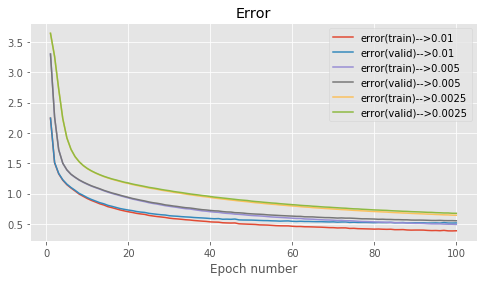

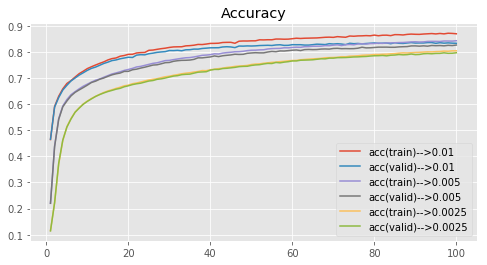

In [36]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer, StochasticLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate1 = 0.01
learning_rate2 = 0.005
learning_rate3 = 0.0025
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

#LeakyReluLayer()
model1= MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

model2= MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

model3= MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
        
        
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule1 = GradientDescentLearningRule(learning_rate = learning_rate1)
learning_rule2 = GradientDescentLearningRule(learning_rate = learning_rate2)
learning_rule3 = GradientDescentLearningRule(learning_rate = learning_rate3)

#Remember to use notebook=False when you write a script to be run in a terminal
fig_1 = plt.figure(figsize=(8, 4))
fig_2 = plt.figure(figsize=(8, 4))

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model1, error, learning_rule1, train_data, valid_data, test_data, num_epochs, stats_interval, '0.01', notebook=True)
print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model2, error, learning_rule2, train_data, valid_data, test_data, num_epochs, stats_interval,  '0.005',notebook=True)

print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model3, error, learning_rule3, train_data, valid_data, test_data, num_epochs, stats_interval,  '0.0025',notebook=True)

print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))


fig_1.savefig('Error_learning-rate.pdf')

fig_2.savefig('ACC_learning-rate.pdf')

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 5.4s to complete
    error(train)=3.66e+00, acc(train)=1.09e-01, error(valid)=3.66e+00, acc(valid)=1.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 4.3s to complete
    error(train)=3.27e+00, acc(train)=2.42e-01, error(valid)=3.27e+00, acc(valid)=2.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 4.0s to complete
    error(train)=2.69e+00, acc(train)=3.68e-01, error(valid)=2.69e+00, acc(valid)=3.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 4.2s to complete
    error(train)=2.20e+00, acc(train)=4.56e-01, error(valid)=2.20e+00, acc(valid)=4.62e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.7s to complete
    error(train)=1.90e+00, acc(train)=5.13e-01, error(valid)=1.90e+00, acc(valid)=5.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 4.1s to complete
    error(train)=1.71e+00, acc(train)=5.45e-01, error(valid)=1.71e+00, acc(valid)=5.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 4.8s to complete
    error(train)=1.58e+00, acc(train)=5.72e-01, error(valid)=1.58e+00, acc(valid)=5.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 5.2s to complete
    error(train)=1.50e+00, acc(train)=5.92e-01, error(valid)=1.50e+00, acc(valid)=5.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 3.7s to complete
    error(train)=1.43e+00, acc(train)=6.05e-01, error(valid)=1.44e+00, acc(valid)=5.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 2.9s to complete
    error(train)=1.38e+00, acc(train)=6.16e-01, error(valid)=1.39e+00, acc(valid)=6.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 3.0s to complete
    error(train)=1.34e+00, acc(train)=6.26e-01, error(valid)=1.35e+00, acc(valid)=6.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 3.3s to complete
    error(train)=1.31e+00, acc(train)=6.35e-01, error(valid)=1.31e+00, acc(valid)=6.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 3.5s to complete
    error(train)=1.28e+00, acc(train)=6.43e-01, error(valid)=1.28e+00, acc(valid)=6.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 3.5s to complete
    error(train)=1.25e+00, acc(train)=6.51e-01, error(valid)=1.26e+00, acc(valid)=6.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 3.1s to complete
    error(train)=1.23e+00, acc(train)=6.56e-01, error(valid)=1.24e+00, acc(valid)=6.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 3.3s to complete
    error(train)=1.21e+00, acc(train)=6.61e-01, error(valid)=1.22e+00, acc(valid)=6.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 3.5s to complete
    error(train)=1.19e+00, acc(train)=6.66e-01, error(valid)=1.20e+00, acc(valid)=6.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 4.2s to complete
    error(train)=1.17e+00, acc(train)=6.72e-01, error(valid)=1.18e+00, acc(valid)=6.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 3.3s to complete
    error(train)=1.15e+00, acc(train)=6.76e-01, error(valid)=1.16e+00, acc(valid)=6.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 3.6s to complete
    error(train)=1.14e+00, acc(train)=6.80e-01, error(valid)=1.15e+00, acc(valid)=6.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.2s to complete
    error(train)=1.12e+00, acc(train)=6.84e-01, error(valid)=1.13e+00, acc(valid)=6.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.6s to complete
    error(train)=1.11e+00, acc(train)=6.89e-01, error(valid)=1.11e+00, acc(valid)=6.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 2.9s to complete
    error(train)=1.09e+00, acc(train)=6.92e-01, error(valid)=1.10e+00, acc(valid)=6.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 4.3s to complete
    error(train)=1.08e+00, acc(train)=6.96e-01, error(valid)=1.09e+00, acc(valid)=6.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 3.8s to complete
    error(train)=1.07e+00, acc(train)=6.99e-01, error(valid)=1.08e+00, acc(valid)=6.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 3.7s to complete
    error(train)=1.05e+00, acc(train)=7.03e-01, error(valid)=1.06e+00, acc(valid)=6.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 3.3s to complete
    error(train)=1.04e+00, acc(train)=7.05e-01, error(valid)=1.05e+00, acc(valid)=7.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 3.6s to complete
    error(train)=1.03e+00, acc(train)=7.10e-01, error(valid)=1.04e+00, acc(valid)=7.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 4.1s to complete
    error(train)=1.02e+00, acc(train)=7.12e-01, error(valid)=1.03e+00, acc(valid)=7.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 5.4s to complete
    error(train)=1.01e+00, acc(train)=7.15e-01, error(valid)=1.02e+00, acc(valid)=7.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 4.0s to complete
    error(train)=9.95e-01, acc(train)=7.16e-01, error(valid)=1.01e+00, acc(valid)=7.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 3.5s to complete
    error(train)=9.85e-01, acc(train)=7.20e-01, error(valid)=9.97e-01, acc(valid)=7.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 4.3s to complete
    error(train)=9.75e-01, acc(train)=7.23e-01, error(valid)=9.87e-01, acc(valid)=7.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 4.7s to complete
    error(train)=9.64e-01, acc(train)=7.26e-01, error(valid)=9.77e-01, acc(valid)=7.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.2s to complete
    error(train)=9.55e-01, acc(train)=7.26e-01, error(valid)=9.68e-01, acc(valid)=7.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 3.7s to complete
    error(train)=9.46e-01, acc(train)=7.30e-01, error(valid)=9.59e-01, acc(valid)=7.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 4.0s to complete
    error(train)=9.36e-01, acc(train)=7.32e-01, error(valid)=9.50e-01, acc(valid)=7.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 5.5s to complete
    error(train)=9.28e-01, acc(train)=7.34e-01, error(valid)=9.41e-01, acc(valid)=7.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 4.5s to complete
    error(train)=9.19e-01, acc(train)=7.35e-01, error(valid)=9.34e-01, acc(valid)=7.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 4.4s to complete
    error(train)=9.10e-01, acc(train)=7.39e-01, error(valid)=9.25e-01, acc(valid)=7.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 3.7s to complete
    error(train)=9.02e-01, acc(train)=7.41e-01, error(valid)=9.17e-01, acc(valid)=7.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 4.6s to complete
    error(train)=8.95e-01, acc(train)=7.42e-01, error(valid)=9.11e-01, acc(valid)=7.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 6.2s to complete
    error(train)=8.87e-01, acc(train)=7.45e-01, error(valid)=9.03e-01, acc(valid)=7.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 4.6s to complete
    error(train)=8.79e-01, acc(train)=7.47e-01, error(valid)=8.96e-01, acc(valid)=7.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 4.4s to complete
    error(train)=8.73e-01, acc(train)=7.49e-01, error(valid)=8.89e-01, acc(valid)=7.45e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 3.5s to complete
    error(train)=8.65e-01, acc(train)=7.51e-01, error(valid)=8.82e-01, acc(valid)=7.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 3.7s to complete
    error(train)=8.59e-01, acc(train)=7.52e-01, error(valid)=8.77e-01, acc(valid)=7.48e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 4.2s to complete
    error(train)=8.53e-01, acc(train)=7.53e-01, error(valid)=8.71e-01, acc(valid)=7.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 3.9s to complete
    error(train)=8.45e-01, acc(train)=7.55e-01, error(valid)=8.63e-01, acc(valid)=7.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 3.7s to complete
    error(train)=8.40e-01, acc(train)=7.56e-01, error(valid)=8.58e-01, acc(valid)=7.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 3.5s to complete
    error(train)=8.33e-01, acc(train)=7.59e-01, error(valid)=8.51e-01, acc(valid)=7.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 3.8s to complete
    error(train)=8.27e-01, acc(train)=7.60e-01, error(valid)=8.46e-01, acc(valid)=7.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 3.7s to complete
    error(train)=8.21e-01, acc(train)=7.61e-01, error(valid)=8.40e-01, acc(valid)=7.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 5.9s to complete
    error(train)=8.15e-01, acc(train)=7.63e-01, error(valid)=8.34e-01, acc(valid)=7.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 5.7s to complete
    error(train)=8.09e-01, acc(train)=7.65e-01, error(valid)=8.29e-01, acc(valid)=7.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 5.5s to complete
    error(train)=8.04e-01, acc(train)=7.65e-01, error(valid)=8.24e-01, acc(valid)=7.60e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 4.8s to complete
    error(train)=7.97e-01, acc(train)=7.68e-01, error(valid)=8.18e-01, acc(valid)=7.63e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 5.8s to complete
    error(train)=7.92e-01, acc(train)=7.70e-01, error(valid)=8.14e-01, acc(valid)=7.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 5.3s to complete
    error(train)=7.87e-01, acc(train)=7.70e-01, error(valid)=8.09e-01, acc(valid)=7.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 4.9s to complete
    error(train)=7.82e-01, acc(train)=7.72e-01, error(valid)=8.03e-01, acc(valid)=7.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 5.4s to complete
    error(train)=7.76e-01, acc(train)=7.73e-01, error(valid)=7.99e-01, acc(valid)=7.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 5.4s to complete
    error(train)=7.72e-01, acc(train)=7.74e-01, error(valid)=7.94e-01, acc(valid)=7.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 3.5s to complete
    error(train)=7.66e-01, acc(train)=7.76e-01, error(valid)=7.89e-01, acc(valid)=7.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 3.4s to complete
    error(train)=7.61e-01, acc(train)=7.76e-01, error(valid)=7.85e-01, acc(valid)=7.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 3.2s to complete
    error(train)=7.58e-01, acc(train)=7.78e-01, error(valid)=7.81e-01, acc(valid)=7.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 4.3s to complete
    error(train)=7.52e-01, acc(train)=7.79e-01, error(valid)=7.76e-01, acc(valid)=7.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 3.5s to complete
    error(train)=7.49e-01, acc(train)=7.80e-01, error(valid)=7.73e-01, acc(valid)=7.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 3.9s to complete
    error(train)=7.43e-01, acc(train)=7.81e-01, error(valid)=7.67e-01, acc(valid)=7.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 4.6s to complete
    error(train)=7.39e-01, acc(train)=7.82e-01, error(valid)=7.64e-01, acc(valid)=7.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 5.6s to complete
    error(train)=7.35e-01, acc(train)=7.82e-01, error(valid)=7.61e-01, acc(valid)=7.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 4.7s to complete
    error(train)=7.30e-01, acc(train)=7.84e-01, error(valid)=7.56e-01, acc(valid)=7.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 6.5s to complete
    error(train)=7.27e-01, acc(train)=7.85e-01, error(valid)=7.52e-01, acc(valid)=7.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 6.7s to complete
    error(train)=7.23e-01, acc(train)=7.86e-01, error(valid)=7.50e-01, acc(valid)=7.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 4.9s to complete
    error(train)=7.19e-01, acc(train)=7.87e-01, error(valid)=7.46e-01, acc(valid)=7.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 3.2s to complete
    error(train)=7.15e-01, acc(train)=7.88e-01, error(valid)=7.42e-01, acc(valid)=7.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 3.2s to complete
    error(train)=7.11e-01, acc(train)=7.89e-01, error(valid)=7.38e-01, acc(valid)=7.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 3.7s to complete
    error(train)=7.07e-01, acc(train)=7.90e-01, error(valid)=7.34e-01, acc(valid)=7.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 3.8s to complete
    error(train)=7.04e-01, acc(train)=7.91e-01, error(valid)=7.31e-01, acc(valid)=7.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 3.6s to complete
    error(train)=7.01e-01, acc(train)=7.91e-01, error(valid)=7.30e-01, acc(valid)=7.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 3.4s to complete
    error(train)=6.97e-01, acc(train)=7.93e-01, error(valid)=7.25e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 3.4s to complete
    error(train)=6.93e-01, acc(train)=7.93e-01, error(valid)=7.22e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 3.7s to complete
    error(train)=6.91e-01, acc(train)=7.93e-01, error(valid)=7.20e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 3.3s to complete
    error(train)=6.87e-01, acc(train)=7.95e-01, error(valid)=7.16e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 3.5s to complete
    error(train)=6.84e-01, acc(train)=7.95e-01, error(valid)=7.14e-01, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 3.4s to complete
    error(train)=6.79e-01, acc(train)=7.97e-01, error(valid)=7.09e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 3.9s to complete
    error(train)=6.77e-01, acc(train)=7.97e-01, error(valid)=7.08e-01, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 3.5s to complete
    error(train)=6.73e-01, acc(train)=7.98e-01, error(valid)=7.04e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 3.5s to complete
    error(train)=6.71e-01, acc(train)=7.99e-01, error(valid)=7.02e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 3.9s to complete
    error(train)=6.68e-01, acc(train)=8.00e-01, error(valid)=6.99e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 3.9s to complete
    error(train)=6.65e-01, acc(train)=8.00e-01, error(valid)=6.97e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 4.2s to complete
    error(train)=6.62e-01, acc(train)=8.00e-01, error(valid)=6.94e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 3.1s to complete
    error(train)=6.59e-01, acc(train)=8.02e-01, error(valid)=6.92e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 3.7s to complete
    error(train)=6.56e-01, acc(train)=8.02e-01, error(valid)=6.89e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 3.3s to complete
    error(train)=6.53e-01, acc(train)=8.03e-01, error(valid)=6.86e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 4.9s to complete
    error(train)=6.52e-01, acc(train)=8.03e-01, error(valid)=6.85e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 4.0s to complete
    error(train)=6.50e-01, acc(train)=8.03e-01, error(valid)=6.84e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 3.6s to complete
    error(train)=6.46e-01, acc(train)=8.05e-01, error(valid)=6.80e-01, acc(valid)=7.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 3.6s to complete
    error(train)=6.43e-01, acc(train)=8.05e-01, error(valid)=6.78e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 3.7s to complete
    error(train)=6.42e-01, acc(train)=8.05e-01, error(valid)=6.77e-01, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 3.8s to complete
    error(train)=6.39e-01, acc(train)=8.06e-01, error(valid)=6.74e-01, acc(valid)=7.96e-01



OrderedDict([('errortest', 0.70698823137705713), ('acctest', 0.7832911392405062)])
    final error(train) = 6.39e-01
    final error(valid) = 6.74e-01
    final acc(train)   = 8.06e-01
    final acc(valid)   = 7.96e-01
    run time per epoch = 6.12


HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 5.1s to complete
    error(train)=6.44e-01, acc(train)=7.94e-01, error(valid)=6.70e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 5.1s to complete
    error(train)=5.54e-01, acc(train)=8.20e-01, error(valid)=6.10e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 5.1s to complete
    error(train)=4.96e-01, acc(train)=8.31e-01, error(valid)=5.79e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 4.4s to complete
    error(train)=4.67e-01, acc(train)=8.37e-01, error(valid)=5.83e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 5.1s to complete
    error(train)=4.47e-01, acc(train)=8.46e-01, error(valid)=5.66e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 5.1s to complete
    error(train)=4.51e-01, acc(train)=8.44e-01, error(valid)=5.88e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 4.8s to complete
    error(train)=4.61e-01, acc(train)=8.45e-01, error(valid)=6.35e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 5.0s to complete
    error(train)=4.43e-01, acc(train)=8.51e-01, error(valid)=6.24e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 6.3s to complete
    error(train)=4.42e-01, acc(train)=8.46e-01, error(valid)=6.34e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 6.6s to complete
    error(train)=4.30e-01, acc(train)=8.56e-01, error(valid)=6.36e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 6.4s to complete
    error(train)=4.40e-01, acc(train)=8.49e-01, error(valid)=6.44e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 5.4s to complete
    error(train)=4.37e-01, acc(train)=8.52e-01, error(valid)=6.71e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 4.6s to complete
    error(train)=4.25e-01, acc(train)=8.57e-01, error(valid)=6.94e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 5.1s to complete
    error(train)=4.55e-01, acc(train)=8.46e-01, error(valid)=7.20e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 6.2s to complete
    error(train)=4.36e-01, acc(train)=8.52e-01, error(valid)=7.11e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 5.2s to complete
    error(train)=4.45e-01, acc(train)=8.54e-01, error(valid)=7.42e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 5.2s to complete
    error(train)=4.45e-01, acc(train)=8.48e-01, error(valid)=7.48e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 6.2s to complete
    error(train)=4.60e-01, acc(train)=8.45e-01, error(valid)=7.72e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 5.3s to complete
    error(train)=4.37e-01, acc(train)=8.54e-01, error(valid)=7.93e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 5.8s to complete
    error(train)=4.95e-01, acc(train)=8.42e-01, error(valid)=8.98e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 6.8s to complete
    error(train)=4.62e-01, acc(train)=8.45e-01, error(valid)=8.11e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 6.3s to complete
    error(train)=4.38e-01, acc(train)=8.53e-01, error(valid)=8.29e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 5.8s to complete
    error(train)=4.42e-01, acc(train)=8.54e-01, error(valid)=8.38e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 5.4s to complete
    error(train)=4.43e-01, acc(train)=8.53e-01, error(valid)=9.13e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 4.8s to complete
    error(train)=4.31e-01, acc(train)=8.59e-01, error(valid)=8.86e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 5.1s to complete
    error(train)=4.67e-01, acc(train)=8.55e-01, error(valid)=9.40e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 5.4s to complete
    error(train)=4.12e-01, acc(train)=8.65e-01, error(valid)=9.04e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 5.1s to complete
    error(train)=4.40e-01, acc(train)=8.61e-01, error(valid)=9.65e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 4.8s to complete
    error(train)=5.33e-01, acc(train)=8.32e-01, error(valid)=9.74e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 5.9s to complete
    error(train)=5.02e-01, acc(train)=8.41e-01, error(valid)=9.97e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 7.5s to complete
    error(train)=4.43e-01, acc(train)=8.62e-01, error(valid)=9.85e-01, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 5.9s to complete
    error(train)=5.18e-01, acc(train)=8.51e-01, error(valid)=1.10e+00, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 5.1s to complete
    error(train)=4.96e-01, acc(train)=8.39e-01, error(valid)=1.02e+00, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 6.8s to complete
    error(train)=4.74e-01, acc(train)=8.47e-01, error(valid)=9.82e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 4.9s to complete
    error(train)=4.73e-01, acc(train)=8.47e-01, error(valid)=9.77e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 5.1s to complete
    error(train)=5.01e-01, acc(train)=8.46e-01, error(valid)=1.06e+00, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 4.8s to complete
    error(train)=4.81e-01, acc(train)=8.50e-01, error(valid)=1.04e+00, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 6.5s to complete
    error(train)=4.83e-01, acc(train)=8.43e-01, error(valid)=1.00e+00, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 7.3s to complete
    error(train)=4.87e-01, acc(train)=8.46e-01, error(valid)=1.08e+00, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 6.6s to complete
    error(train)=5.03e-01, acc(train)=8.46e-01, error(valid)=1.10e+00, acc(valid)=7.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 8.0s to complete
    error(train)=4.72e-01, acc(train)=8.52e-01, error(valid)=1.09e+00, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 7.6s to complete
    error(train)=4.91e-01, acc(train)=8.51e-01, error(valid)=1.09e+00, acc(valid)=7.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 7.8s to complete
    error(train)=4.48e-01, acc(train)=8.59e-01, error(valid)=1.09e+00, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 6.0s to complete
    error(train)=4.76e-01, acc(train)=8.48e-01, error(valid)=1.04e+00, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 5.4s to complete
    error(train)=4.76e-01, acc(train)=8.51e-01, error(valid)=1.10e+00, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 5.8s to complete
    error(train)=4.49e-01, acc(train)=8.57e-01, error(valid)=1.09e+00, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 4.5s to complete
    error(train)=4.58e-01, acc(train)=8.51e-01, error(valid)=1.08e+00, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 5.7s to complete
    error(train)=4.89e-01, acc(train)=8.56e-01, error(valid)=1.25e+00, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 5.2s to complete
    error(train)=5.07e-01, acc(train)=8.58e-01, error(valid)=1.26e+00, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 5.3s to complete
    error(train)=5.46e-01, acc(train)=8.41e-01, error(valid)=1.27e+00, acc(valid)=7.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 4.8s to complete
    error(train)=5.04e-01, acc(train)=8.46e-01, error(valid)=1.20e+00, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 5.7s to complete
    error(train)=4.45e-01, acc(train)=8.56e-01, error(valid)=1.14e+00, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 5.2s to complete
    error(train)=5.27e-01, acc(train)=8.44e-01, error(valid)=1.21e+00, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 4.8s to complete
    error(train)=4.87e-01, acc(train)=8.46e-01, error(valid)=1.21e+00, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 4.8s to complete
    error(train)=5.11e-01, acc(train)=8.47e-01, error(valid)=1.26e+00, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 4.7s to complete
    error(train)=4.79e-01, acc(train)=8.52e-01, error(valid)=1.19e+00, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 4.7s to complete
    error(train)=4.69e-01, acc(train)=8.51e-01, error(valid)=1.14e+00, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 4.4s to complete
    error(train)=4.59e-01, acc(train)=8.56e-01, error(valid)=1.20e+00, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 5.5s to complete
    error(train)=4.79e-01, acc(train)=8.52e-01, error(valid)=1.15e+00, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 4.9s to complete
    error(train)=4.76e-01, acc(train)=8.53e-01, error(valid)=1.19e+00, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 4.4s to complete
    error(train)=4.58e-01, acc(train)=8.53e-01, error(valid)=1.16e+00, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 4.9s to complete
    error(train)=4.43e-01, acc(train)=8.56e-01, error(valid)=1.14e+00, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 4.6s to complete
    error(train)=4.66e-01, acc(train)=8.49e-01, error(valid)=1.10e+00, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 5.0s to complete
    error(train)=4.48e-01, acc(train)=8.57e-01, error(valid)=1.18e+00, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 4.6s to complete
    error(train)=5.38e-01, acc(train)=8.43e-01, error(valid)=1.31e+00, acc(valid)=7.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 4.3s to complete
    error(train)=5.05e-01, acc(train)=8.43e-01, error(valid)=1.23e+00, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 4.6s to complete
    error(train)=4.74e-01, acc(train)=8.51e-01, error(valid)=1.20e+00, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 4.8s to complete
    error(train)=4.92e-01, acc(train)=8.50e-01, error(valid)=1.30e+00, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 3.9s to complete
    error(train)=4.63e-01, acc(train)=8.60e-01, error(valid)=1.29e+00, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 5.8s to complete
    error(train)=4.98e-01, acc(train)=8.48e-01, error(valid)=1.23e+00, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 5.0s to complete
    error(train)=4.78e-01, acc(train)=8.50e-01, error(valid)=1.23e+00, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 4.8s to complete
    error(train)=4.52e-01, acc(train)=8.54e-01, error(valid)=1.10e+00, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 4.9s to complete
    error(train)=5.32e-01, acc(train)=8.45e-01, error(valid)=1.31e+00, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 4.4s to complete
    error(train)=4.89e-01, acc(train)=8.47e-01, error(valid)=1.16e+00, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 4.3s to complete
    error(train)=4.44e-01, acc(train)=8.55e-01, error(valid)=1.14e+00, acc(valid)=7.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 4.7s to complete
    error(train)=4.60e-01, acc(train)=8.52e-01, error(valid)=1.18e+00, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 6.3s to complete
    error(train)=4.59e-01, acc(train)=8.51e-01, error(valid)=1.18e+00, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 4.3s to complete
    error(train)=5.06e-01, acc(train)=8.44e-01, error(valid)=1.24e+00, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 4.7s to complete
    error(train)=4.42e-01, acc(train)=8.55e-01, error(valid)=1.18e+00, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 4.7s to complete
    error(train)=4.59e-01, acc(train)=8.52e-01, error(valid)=1.22e+00, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 5.2s to complete
    error(train)=4.64e-01, acc(train)=8.54e-01, error(valid)=1.29e+00, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 4.4s to complete
    error(train)=4.50e-01, acc(train)=8.54e-01, error(valid)=1.16e+00, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 4.4s to complete
    error(train)=4.53e-01, acc(train)=8.52e-01, error(valid)=1.11e+00, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 4.8s to complete
    error(train)=4.93e-01, acc(train)=8.42e-01, error(valid)=1.15e+00, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 4.8s to complete
    error(train)=4.30e-01, acc(train)=8.59e-01, error(valid)=1.15e+00, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 4.4s to complete
    error(train)=4.47e-01, acc(train)=8.52e-01, error(valid)=1.09e+00, acc(valid)=7.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 4.6s to complete
    error(train)=4.93e-01, acc(train)=8.45e-01, error(valid)=1.23e+00, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 4.4s to complete
    error(train)=4.76e-01, acc(train)=8.53e-01, error(valid)=1.31e+00, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 5.2s to complete
    error(train)=4.48e-01, acc(train)=8.51e-01, error(valid)=1.15e+00, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 4.5s to complete
    error(train)=4.82e-01, acc(train)=8.47e-01, error(valid)=1.16e+00, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 4.9s to complete
    error(train)=5.10e-01, acc(train)=8.44e-01, error(valid)=1.21e+00, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 5.0s to complete
    error(train)=4.55e-01, acc(train)=8.50e-01, error(valid)=1.11e+00, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 5.4s to complete
    error(train)=5.66e-01, acc(train)=8.32e-01, error(valid)=1.31e+00, acc(valid)=7.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 4.6s to complete
    error(train)=4.22e-01, acc(train)=8.64e-01, error(valid)=1.15e+00, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 5.7s to complete
    error(train)=4.63e-01, acc(train)=8.55e-01, error(valid)=1.22e+00, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 4.9s to complete
    error(train)=4.78e-01, acc(train)=8.50e-01, error(valid)=1.22e+00, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 4.5s to complete
    error(train)=4.90e-01, acc(train)=8.52e-01, error(valid)=1.26e+00, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 6.0s to complete
    error(train)=4.65e-01, acc(train)=8.50e-01, error(valid)=1.17e+00, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 8.1s to complete
    error(train)=4.35e-01, acc(train)=8.59e-01, error(valid)=1.17e+00, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 5.8s to complete
    error(train)=4.64e-01, acc(train)=8.51e-01, error(valid)=1.16e+00, acc(valid)=7.93e-01



OrderedDict([('errortest', 1.2316900163385063), ('acctest', 0.78341772151898714)])
    final error(train) = 4.64e-01
    final error(valid) = 1.16e+00
    final acc(train)   = 8.51e-01
    final acc(valid)   = 7.93e-01
    run time per epoch = 7.28


HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 6.1s to complete
    error(train)=8.33e-01, acc(train)=7.48e-01, error(valid)=8.50e-01, acc(valid)=7.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 8.0s to complete
    error(train)=6.90e-01, acc(train)=7.88e-01, error(valid)=7.14e-01, acc(valid)=7.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 6.9s to complete
    error(train)=6.23e-01, acc(train)=8.03e-01, error(valid)=6.55e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 5.8s to complete
    error(train)=5.72e-01, acc(train)=8.16e-01, error(valid)=6.10e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 7.1s to complete
    error(train)=5.35e-01, acc(train)=8.29e-01, error(valid)=5.82e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 6.6s to complete
    error(train)=5.13e-01, acc(train)=8.34e-01, error(valid)=5.68e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 7.2s to complete
    error(train)=4.90e-01, acc(train)=8.40e-01, error(valid)=5.52e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 7.1s to complete
    error(train)=4.67e-01, acc(train)=8.47e-01, error(valid)=5.36e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 7.8s to complete
    error(train)=4.54e-01, acc(train)=8.51e-01, error(valid)=5.29e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 6.8s to complete
    error(train)=4.33e-01, acc(train)=8.57e-01, error(valid)=5.15e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 8.2s to complete
    error(train)=4.21e-01, acc(train)=8.60e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 6.3s to complete
    error(train)=4.18e-01, acc(train)=8.59e-01, error(valid)=5.16e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 7.1s to complete
    error(train)=4.05e-01, acc(train)=8.63e-01, error(valid)=5.09e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 7.8s to complete
    error(train)=3.91e-01, acc(train)=8.67e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 7.1s to complete
    error(train)=3.85e-01, acc(train)=8.68e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 6.9s to complete
    error(train)=3.73e-01, acc(train)=8.73e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 8.9s to complete
    error(train)=3.76e-01, acc(train)=8.71e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 7.7s to complete
    error(train)=3.59e-01, acc(train)=8.78e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 8.2s to complete
    error(train)=3.55e-01, acc(train)=8.78e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 7.1s to complete
    error(train)=3.49e-01, acc(train)=8.80e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 8.0s to complete
    error(train)=3.44e-01, acc(train)=8.82e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 7.3s to complete
    error(train)=3.37e-01, acc(train)=8.84e-01, error(valid)=5.02e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 6.9s to complete
    error(train)=3.36e-01, acc(train)=8.82e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 6.4s to complete
    error(train)=3.28e-01, acc(train)=8.85e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 6.5s to complete
    error(train)=3.20e-01, acc(train)=8.89e-01, error(valid)=5.00e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 6.6s to complete
    error(train)=3.23e-01, acc(train)=8.88e-01, error(valid)=5.11e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 5.9s to complete
    error(train)=3.09e-01, acc(train)=8.91e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 6.2s to complete
    error(train)=3.11e-01, acc(train)=8.91e-01, error(valid)=5.16e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 7.3s to complete
    error(train)=3.07e-01, acc(train)=8.91e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 7.6s to complete
    error(train)=3.09e-01, acc(train)=8.91e-01, error(valid)=5.23e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 6.8s to complete
    error(train)=2.93e-01, acc(train)=8.97e-01, error(valid)=5.10e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 8.1s to complete
    error(train)=2.94e-01, acc(train)=8.97e-01, error(valid)=5.19e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 7.3s to complete
    error(train)=3.04e-01, acc(train)=8.92e-01, error(valid)=5.38e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 6.2s to complete
    error(train)=2.88e-01, acc(train)=8.99e-01, error(valid)=5.25e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 9.7s to complete
    error(train)=2.87e-01, acc(train)=8.97e-01, error(valid)=5.34e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 11.0s to complete
    error(train)=2.78e-01, acc(train)=9.03e-01, error(valid)=5.22e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 8.9s to complete
    error(train)=2.75e-01, acc(train)=9.02e-01, error(valid)=5.29e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 12.5s to complete
    error(train)=2.71e-01, acc(train)=9.03e-01, error(valid)=5.30e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 8.6s to complete
    error(train)=2.76e-01, acc(train)=9.02e-01, error(valid)=5.44e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 9.5s to complete
    error(train)=2.65e-01, acc(train)=9.06e-01, error(valid)=5.40e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 11.7s to complete
    error(train)=2.62e-01, acc(train)=9.06e-01, error(valid)=5.37e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 8.3s to complete
    error(train)=2.63e-01, acc(train)=9.05e-01, error(valid)=5.52e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 7.4s to complete
    error(train)=2.60e-01, acc(train)=9.07e-01, error(valid)=5.55e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 8.2s to complete
    error(train)=2.59e-01, acc(train)=9.06e-01, error(valid)=5.52e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 9.2s to complete
    error(train)=2.55e-01, acc(train)=9.08e-01, error(valid)=5.61e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 7.8s to complete
    error(train)=2.51e-01, acc(train)=9.09e-01, error(valid)=5.59e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 7.8s to complete
    error(train)=2.43e-01, acc(train)=9.13e-01, error(valid)=5.59e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 10.6s to complete
    error(train)=2.46e-01, acc(train)=9.11e-01, error(valid)=5.70e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 7.8s to complete
    error(train)=2.49e-01, acc(train)=9.09e-01, error(valid)=5.74e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 9.9s to complete
    error(train)=2.35e-01, acc(train)=9.16e-01, error(valid)=5.69e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 9.7s to complete
    error(train)=2.41e-01, acc(train)=9.13e-01, error(valid)=5.73e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 8.1s to complete
    error(train)=2.39e-01, acc(train)=9.12e-01, error(valid)=5.80e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 7.8s to complete
    error(train)=2.30e-01, acc(train)=9.17e-01, error(valid)=5.81e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 7.4s to complete
    error(train)=2.25e-01, acc(train)=9.19e-01, error(valid)=5.76e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 8.1s to complete
    error(train)=2.33e-01, acc(train)=9.14e-01, error(valid)=5.97e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 7.8s to complete
    error(train)=2.20e-01, acc(train)=9.21e-01, error(valid)=5.85e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 7.7s to complete
    error(train)=2.27e-01, acc(train)=9.16e-01, error(valid)=6.03e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 7.1s to complete
    error(train)=2.21e-01, acc(train)=9.19e-01, error(valid)=6.04e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 7.6s to complete
    error(train)=2.22e-01, acc(train)=9.18e-01, error(valid)=6.07e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 8.8s to complete
    error(train)=2.16e-01, acc(train)=9.22e-01, error(valid)=6.05e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 7.7s to complete
    error(train)=2.18e-01, acc(train)=9.21e-01, error(valid)=6.15e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 10.6s to complete
    error(train)=2.12e-01, acc(train)=9.23e-01, error(valid)=6.08e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 8.7s to complete
    error(train)=2.16e-01, acc(train)=9.20e-01, error(valid)=6.21e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 6.3s to complete
    error(train)=2.13e-01, acc(train)=9.21e-01, error(valid)=6.29e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 8.0s to complete
    error(train)=2.10e-01, acc(train)=9.22e-01, error(valid)=6.21e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 8.4s to complete
    error(train)=2.05e-01, acc(train)=9.25e-01, error(valid)=6.25e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 7.7s to complete
    error(train)=2.06e-01, acc(train)=9.24e-01, error(valid)=6.39e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 8.3s to complete
    error(train)=2.07e-01, acc(train)=9.23e-01, error(valid)=6.48e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 7.7s to complete
    error(train)=1.98e-01, acc(train)=9.27e-01, error(valid)=6.41e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 6.6s to complete
    error(train)=1.96e-01, acc(train)=9.28e-01, error(valid)=6.46e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 6.0s to complete
    error(train)=1.97e-01, acc(train)=9.27e-01, error(valid)=6.56e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 7.7s to complete
    error(train)=2.01e-01, acc(train)=9.25e-01, error(valid)=6.65e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 5.7s to complete
    error(train)=2.00e-01, acc(train)=9.26e-01, error(valid)=6.71e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 5.8s to complete
    error(train)=1.93e-01, acc(train)=9.28e-01, error(valid)=6.65e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 6.9s to complete
    error(train)=1.90e-01, acc(train)=9.30e-01, error(valid)=6.66e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 6.8s to complete
    error(train)=1.91e-01, acc(train)=9.29e-01, error(valid)=6.72e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 7.5s to complete
    error(train)=1.88e-01, acc(train)=9.29e-01, error(valid)=6.85e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 7.0s to complete
    error(train)=1.89e-01, acc(train)=9.29e-01, error(valid)=6.95e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 5.9s to complete
    error(train)=1.84e-01, acc(train)=9.32e-01, error(valid)=6.93e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 7.8s to complete
    error(train)=1.82e-01, acc(train)=9.33e-01, error(valid)=6.96e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 6.7s to complete
    error(train)=1.97e-01, acc(train)=9.25e-01, error(valid)=7.20e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 6.3s to complete
    error(train)=1.85e-01, acc(train)=9.29e-01, error(valid)=7.07e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 6.9s to complete
    error(train)=1.82e-01, acc(train)=9.31e-01, error(valid)=7.04e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 6.6s to complete
    error(train)=1.79e-01, acc(train)=9.31e-01, error(valid)=7.12e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 5.9s to complete
    error(train)=1.83e-01, acc(train)=9.30e-01, error(valid)=7.20e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 6.9s to complete
    error(train)=1.74e-01, acc(train)=9.35e-01, error(valid)=7.25e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 6.1s to complete
    error(train)=1.76e-01, acc(train)=9.34e-01, error(valid)=7.38e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 6.8s to complete
    error(train)=1.79e-01, acc(train)=9.32e-01, error(valid)=7.39e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 6.1s to complete
    error(train)=1.74e-01, acc(train)=9.34e-01, error(valid)=7.44e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 6.3s to complete
    error(train)=1.72e-01, acc(train)=9.35e-01, error(valid)=7.40e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 5.9s to complete
    error(train)=1.73e-01, acc(train)=9.34e-01, error(valid)=7.47e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 6.3s to complete
    error(train)=1.72e-01, acc(train)=9.35e-01, error(valid)=7.60e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 5.8s to complete
    error(train)=1.74e-01, acc(train)=9.32e-01, error(valid)=7.74e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 7.8s to complete
    error(train)=1.69e-01, acc(train)=9.36e-01, error(valid)=7.68e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 6.3s to complete
    error(train)=1.65e-01, acc(train)=9.37e-01, error(valid)=7.77e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 9.6s to complete
    error(train)=1.69e-01, acc(train)=9.35e-01, error(valid)=7.85e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 6.7s to complete
    error(train)=1.65e-01, acc(train)=9.36e-01, error(valid)=7.90e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 7.2s to complete
    error(train)=1.70e-01, acc(train)=9.35e-01, error(valid)=7.97e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 6.5s to complete
    error(train)=1.60e-01, acc(train)=9.39e-01, error(valid)=7.99e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 5.7s to complete
    error(train)=1.63e-01, acc(train)=9.38e-01, error(valid)=8.00e-01, acc(valid)=8.23e-01



OrderedDict([('errortest', 0.85261018033225977), ('acctest', 0.80854430379746833)])
    final error(train) = 1.63e-01
    final error(valid) = 8.00e-01
    final acc(train)   = 9.38e-01
    final acc(valid)   = 8.23e-01
    run time per epoch = 9.77


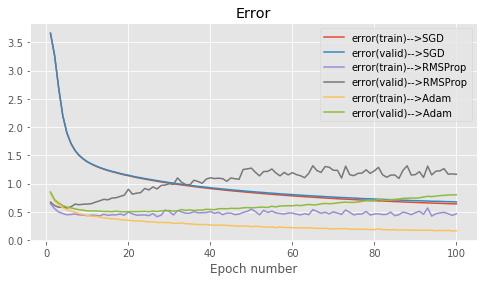

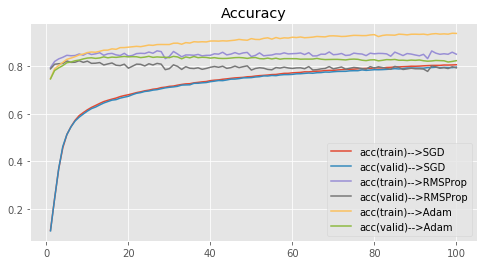

In [35]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer, StochasticLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule, RMSPropLearningRule, AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters

learning_rate = 0.0025
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

#LeakyReluLayer()
model1= MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

model2= MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
        
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

model3= MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
        
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule1 = GradientDescentLearningRule(learning_rate = learning_rate)
learning_rule2 = RMSPropLearningRule(learning_rate = learning_rate)
learning_rule3 = AdamLearningRule(learning_rate = learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
fig_1 = plt.figure(figsize=(8, 4))
fig_2 = plt.figure(figsize=(8, 4))

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model1, error, learning_rule1, train_data, valid_data, test_data, num_epochs, stats_interval, 'SGD', notebook=True)
print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model2, error, learning_rule2, train_data, valid_data, test_data, num_epochs, stats_interval,  'RMSProp',notebook=True)

print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model3, error, learning_rule3, train_data, valid_data, test_data, num_epochs, stats_interval,  'Adam',notebook=True)

print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))


fig_1.savefig('Error_learning-rule.pdf')

fig_2.savefig('ACC_learning-rule.pdf')

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 5.2s to complete
    error(train)=3.84e+00, acc(train)=3.32e-02, error(valid)=3.84e+00, acc(valid)=3.25e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 3.6s to complete
    error(train)=3.83e+00, acc(train)=5.31e-02, error(valid)=3.83e+00, acc(valid)=5.09e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 3.9s to complete
    error(train)=3.82e+00, acc(train)=6.84e-02, error(valid)=3.82e+00, acc(valid)=6.56e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 4.6s to complete
    error(train)=3.80e+00, acc(train)=8.02e-02, error(valid)=3.80e+00, acc(valid)=7.59e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 4.3s to complete
    error(train)=3.78e+00, acc(train)=8.89e-02, error(valid)=3.78e+00, acc(valid)=8.34e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.8s to complete
    error(train)=3.76e+00, acc(train)=9.53e-02, error(valid)=3.76e+00, acc(valid)=8.94e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 4.2s to complete
    error(train)=3.73e+00, acc(train)=1.02e-01, error(valid)=3.73e+00, acc(valid)=9.61e-02


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 4.7s to complete
    error(train)=3.69e+00, acc(train)=1.12e-01, error(valid)=3.69e+00, acc(valid)=1.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 4.7s to complete
    error(train)=3.65e+00, acc(train)=1.27e-01, error(valid)=3.65e+00, acc(valid)=1.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 4.0s to complete
    error(train)=3.61e+00, acc(train)=1.46e-01, error(valid)=3.61e+00, acc(valid)=1.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 5.0s to complete
    error(train)=3.56e+00, acc(train)=1.64e-01, error(valid)=3.56e+00, acc(valid)=1.59e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 4.8s to complete
    error(train)=3.50e+00, acc(train)=1.85e-01, error(valid)=3.50e+00, acc(valid)=1.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 5.7s to complete
    error(train)=3.44e+00, acc(train)=2.04e-01, error(valid)=3.44e+00, acc(valid)=1.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 7.7s to complete
    error(train)=3.37e+00, acc(train)=2.29e-01, error(valid)=3.37e+00, acc(valid)=2.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 5.7s to complete
    error(train)=3.30e+00, acc(train)=2.48e-01, error(valid)=3.30e+00, acc(valid)=2.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 4.3s to complete
    error(train)=3.22e+00, acc(train)=2.70e-01, error(valid)=3.22e+00, acc(valid)=2.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 3.7s to complete
    error(train)=3.15e+00, acc(train)=2.93e-01, error(valid)=3.15e+00, acc(valid)=2.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 4.1s to complete
    error(train)=3.07e+00, acc(train)=3.16e-01, error(valid)=3.07e+00, acc(valid)=3.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 4.9s to complete
    error(train)=3.00e+00, acc(train)=3.36e-01, error(valid)=3.00e+00, acc(valid)=3.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 3.9s to complete
    error(train)=2.92e+00, acc(train)=3.57e-01, error(valid)=2.92e+00, acc(valid)=3.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 4.6s to complete
    error(train)=2.84e+00, acc(train)=3.71e-01, error(valid)=2.84e+00, acc(valid)=3.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.8s to complete
    error(train)=2.77e+00, acc(train)=3.85e-01, error(valid)=2.77e+00, acc(valid)=3.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 3.5s to complete
    error(train)=2.70e+00, acc(train)=3.99e-01, error(valid)=2.70e+00, acc(valid)=3.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 4.6s to complete
    error(train)=2.63e+00, acc(train)=4.12e-01, error(valid)=2.64e+00, acc(valid)=4.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 4.2s to complete
    error(train)=2.57e+00, acc(train)=4.22e-01, error(valid)=2.57e+00, acc(valid)=4.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 3.6s to complete
    error(train)=2.51e+00, acc(train)=4.31e-01, error(valid)=2.51e+00, acc(valid)=4.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 4.2s to complete
    error(train)=2.45e+00, acc(train)=4.39e-01, error(valid)=2.46e+00, acc(valid)=4.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 4.3s to complete
    error(train)=2.40e+00, acc(train)=4.47e-01, error(valid)=2.40e+00, acc(valid)=4.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 3.8s to complete
    error(train)=2.35e+00, acc(train)=4.56e-01, error(valid)=2.36e+00, acc(valid)=4.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.7s to complete
    error(train)=2.31e+00, acc(train)=4.63e-01, error(valid)=2.32e+00, acc(valid)=4.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 4.1s to complete
    error(train)=2.27e+00, acc(train)=4.70e-01, error(valid)=2.27e+00, acc(valid)=4.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 3.8s to complete
    error(train)=2.23e+00, acc(train)=4.76e-01, error(valid)=2.23e+00, acc(valid)=4.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 3.8s to complete
    error(train)=2.19e+00, acc(train)=4.82e-01, error(valid)=2.20e+00, acc(valid)=4.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 4.2s to complete
    error(train)=2.16e+00, acc(train)=4.89e-01, error(valid)=2.16e+00, acc(valid)=4.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 3.7s to complete
    error(train)=2.12e+00, acc(train)=4.95e-01, error(valid)=2.13e+00, acc(valid)=4.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 4.3s to complete
    error(train)=2.09e+00, acc(train)=5.00e-01, error(valid)=2.09e+00, acc(valid)=4.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 3.8s to complete
    error(train)=2.06e+00, acc(train)=5.04e-01, error(valid)=2.06e+00, acc(valid)=5.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 6.3s to complete
    error(train)=2.03e+00, acc(train)=5.09e-01, error(valid)=2.04e+00, acc(valid)=5.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 3.6s to complete
    error(train)=2.01e+00, acc(train)=5.12e-01, error(valid)=2.01e+00, acc(valid)=5.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 6.2s to complete
    error(train)=1.98e+00, acc(train)=5.16e-01, error(valid)=1.98e+00, acc(valid)=5.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 4.4s to complete
    error(train)=1.95e+00, acc(train)=5.21e-01, error(valid)=1.95e+00, acc(valid)=5.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 4.0s to complete
    error(train)=1.93e+00, acc(train)=5.25e-01, error(valid)=1.93e+00, acc(valid)=5.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 6.0s to complete
    error(train)=1.90e+00, acc(train)=5.31e-01, error(valid)=1.91e+00, acc(valid)=5.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 4.5s to complete
    error(train)=1.88e+00, acc(train)=5.33e-01, error(valid)=1.89e+00, acc(valid)=5.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 6.9s to complete
    error(train)=1.86e+00, acc(train)=5.36e-01, error(valid)=1.87e+00, acc(valid)=5.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 6.3s to complete
    error(train)=1.84e+00, acc(train)=5.41e-01, error(valid)=1.85e+00, acc(valid)=5.36e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 5.0s to complete
    error(train)=1.82e+00, acc(train)=5.44e-01, error(valid)=1.83e+00, acc(valid)=5.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 4.5s to complete
    error(train)=1.80e+00, acc(train)=5.48e-01, error(valid)=1.81e+00, acc(valid)=5.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 6.6s to complete
    error(train)=1.79e+00, acc(train)=5.49e-01, error(valid)=1.79e+00, acc(valid)=5.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 8.7s to complete
    error(train)=1.77e+00, acc(train)=5.53e-01, error(valid)=1.78e+00, acc(valid)=5.49e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 5.0s to complete
    error(train)=1.76e+00, acc(train)=5.55e-01, error(valid)=1.76e+00, acc(valid)=5.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 3.7s to complete
    error(train)=1.74e+00, acc(train)=5.56e-01, error(valid)=1.75e+00, acc(valid)=5.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 4.2s to complete
    error(train)=1.72e+00, acc(train)=5.60e-01, error(valid)=1.73e+00, acc(valid)=5.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 4.7s to complete
    error(train)=1.71e+00, acc(train)=5.63e-01, error(valid)=1.72e+00, acc(valid)=5.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 4.7s to complete
    error(train)=1.70e+00, acc(train)=5.65e-01, error(valid)=1.70e+00, acc(valid)=5.62e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 6.1s to complete
    error(train)=1.69e+00, acc(train)=5.68e-01, error(valid)=1.69e+00, acc(valid)=5.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 5.1s to complete
    error(train)=1.67e+00, acc(train)=5.68e-01, error(valid)=1.68e+00, acc(valid)=5.65e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 5.2s to complete
    error(train)=1.66e+00, acc(train)=5.72e-01, error(valid)=1.67e+00, acc(valid)=5.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 4.5s to complete
    error(train)=1.65e+00, acc(train)=5.74e-01, error(valid)=1.65e+00, acc(valid)=5.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 5.5s to complete
    error(train)=1.64e+00, acc(train)=5.75e-01, error(valid)=1.64e+00, acc(valid)=5.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 5.8s to complete
    error(train)=1.63e+00, acc(train)=5.78e-01, error(valid)=1.63e+00, acc(valid)=5.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 6.0s to complete
    error(train)=1.61e+00, acc(train)=5.80e-01, error(valid)=1.62e+00, acc(valid)=5.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 6.3s to complete
    error(train)=1.60e+00, acc(train)=5.81e-01, error(valid)=1.61e+00, acc(valid)=5.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 4.2s to complete
    error(train)=1.59e+00, acc(train)=5.84e-01, error(valid)=1.60e+00, acc(valid)=5.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 4.9s to complete
    error(train)=1.58e+00, acc(train)=5.86e-01, error(valid)=1.59e+00, acc(valid)=5.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 5.3s to complete
    error(train)=1.57e+00, acc(train)=5.87e-01, error(valid)=1.58e+00, acc(valid)=5.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 5.1s to complete
    error(train)=1.57e+00, acc(train)=5.90e-01, error(valid)=1.57e+00, acc(valid)=5.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 5.5s to complete
    error(train)=1.55e+00, acc(train)=5.90e-01, error(valid)=1.56e+00, acc(valid)=5.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 5.7s to complete
    error(train)=1.54e+00, acc(train)=5.92e-01, error(valid)=1.55e+00, acc(valid)=5.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 7.2s to complete
    error(train)=1.53e+00, acc(train)=5.94e-01, error(valid)=1.54e+00, acc(valid)=5.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 4.8s to complete
    error(train)=1.52e+00, acc(train)=5.97e-01, error(valid)=1.53e+00, acc(valid)=5.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 4.2s to complete
    error(train)=1.52e+00, acc(train)=5.98e-01, error(valid)=1.53e+00, acc(valid)=5.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 5.3s to complete
    error(train)=1.51e+00, acc(train)=5.99e-01, error(valid)=1.52e+00, acc(valid)=5.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 5.6s to complete
    error(train)=1.50e+00, acc(train)=6.01e-01, error(valid)=1.51e+00, acc(valid)=5.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 5.4s to complete
    error(train)=1.50e+00, acc(train)=6.02e-01, error(valid)=1.51e+00, acc(valid)=5.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 4.6s to complete
    error(train)=1.49e+00, acc(train)=6.03e-01, error(valid)=1.50e+00, acc(valid)=6.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 4.6s to complete
    error(train)=1.48e+00, acc(train)=6.05e-01, error(valid)=1.49e+00, acc(valid)=6.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 4.8s to complete
    error(train)=1.48e+00, acc(train)=6.07e-01, error(valid)=1.48e+00, acc(valid)=6.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 5.1s to complete
    error(train)=1.47e+00, acc(train)=6.08e-01, error(valid)=1.48e+00, acc(valid)=6.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 4.1s to complete
    error(train)=1.46e+00, acc(train)=6.09e-01, error(valid)=1.47e+00, acc(valid)=6.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 3.8s to complete
    error(train)=1.46e+00, acc(train)=6.10e-01, error(valid)=1.46e+00, acc(valid)=6.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 4.1s to complete
    error(train)=1.45e+00, acc(train)=6.11e-01, error(valid)=1.46e+00, acc(valid)=6.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 5.0s to complete
    error(train)=1.44e+00, acc(train)=6.13e-01, error(valid)=1.45e+00, acc(valid)=6.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 5.0s to complete
    error(train)=1.44e+00, acc(train)=6.14e-01, error(valid)=1.45e+00, acc(valid)=6.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 4.4s to complete
    error(train)=1.43e+00, acc(train)=6.15e-01, error(valid)=1.44e+00, acc(valid)=6.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 4.8s to complete
    error(train)=1.42e+00, acc(train)=6.16e-01, error(valid)=1.43e+00, acc(valid)=6.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 4.0s to complete
    error(train)=1.42e+00, acc(train)=6.18e-01, error(valid)=1.43e+00, acc(valid)=6.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 5.5s to complete
    error(train)=1.42e+00, acc(train)=6.19e-01, error(valid)=1.43e+00, acc(valid)=6.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 3.6s to complete
    error(train)=1.41e+00, acc(train)=6.20e-01, error(valid)=1.42e+00, acc(valid)=6.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 5.5s to complete
    error(train)=1.41e+00, acc(train)=6.21e-01, error(valid)=1.41e+00, acc(valid)=6.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 3.5s to complete
    error(train)=1.40e+00, acc(train)=6.23e-01, error(valid)=1.41e+00, acc(valid)=6.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 5.6s to complete
    error(train)=1.39e+00, acc(train)=6.24e-01, error(valid)=1.40e+00, acc(valid)=6.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 4.8s to complete
    error(train)=1.39e+00, acc(train)=6.26e-01, error(valid)=1.40e+00, acc(valid)=6.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 4.3s to complete
    error(train)=1.38e+00, acc(train)=6.27e-01, error(valid)=1.39e+00, acc(valid)=6.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 4.2s to complete
    error(train)=1.38e+00, acc(train)=6.28e-01, error(valid)=1.39e+00, acc(valid)=6.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 3.9s to complete
    error(train)=1.37e+00, acc(train)=6.28e-01, error(valid)=1.38e+00, acc(valid)=6.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 4.2s to complete
    error(train)=1.37e+00, acc(train)=6.31e-01, error(valid)=1.38e+00, acc(valid)=6.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 4.7s to complete
    error(train)=1.36e+00, acc(train)=6.31e-01, error(valid)=1.37e+00, acc(valid)=6.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 4.1s to complete
    error(train)=1.36e+00, acc(train)=6.32e-01, error(valid)=1.37e+00, acc(valid)=6.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 4.4s to complete
    error(train)=1.36e+00, acc(train)=6.33e-01, error(valid)=1.36e+00, acc(valid)=6.27e-01



OrderedDict([('errortest', 1.3772932611673132), ('acctest', 0.6187974683544305)])
    final error(train) = 1.36e+00
    final error(valid) = 1.36e+00
    final acc(train)   = 6.33e-01
    final acc(valid)   = 6.27e-01
    run time per epoch = 7.28


HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 5.3s to complete
    error(train)=3.63e+00, acc(train)=1.21e-01, error(valid)=3.64e+00, acc(valid)=1.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 4.0s to complete
    error(train)=3.23e+00, acc(train)=2.45e-01, error(valid)=3.24e+00, acc(valid)=2.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 3.8s to complete
    error(train)=2.65e+00, acc(train)=3.75e-01, error(valid)=2.66e+00, acc(valid)=3.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 5.2s to complete
    error(train)=2.16e+00, acc(train)=4.66e-01, error(valid)=2.17e+00, acc(valid)=4.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 3.9s to complete
    error(train)=1.85e+00, acc(train)=5.23e-01, error(valid)=1.86e+00, acc(valid)=5.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 3.8s to complete
    error(train)=1.67e+00, acc(train)=5.56e-01, error(valid)=1.67e+00, acc(valid)=5.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 3.6s to complete
    error(train)=1.56e+00, acc(train)=5.80e-01, error(valid)=1.56e+00, acc(valid)=5.73e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 3.6s to complete
    error(train)=1.48e+00, acc(train)=5.96e-01, error(valid)=1.48e+00, acc(valid)=5.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 3.7s to complete
    error(train)=1.42e+00, acc(train)=6.09e-01, error(valid)=1.43e+00, acc(valid)=6.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 4.0s to complete
    error(train)=1.38e+00, acc(train)=6.19e-01, error(valid)=1.38e+00, acc(valid)=6.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 3.4s to complete
    error(train)=1.34e+00, acc(train)=6.29e-01, error(valid)=1.34e+00, acc(valid)=6.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 3.4s to complete
    error(train)=1.31e+00, acc(train)=6.36e-01, error(valid)=1.32e+00, acc(valid)=6.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 2.8s to complete
    error(train)=1.28e+00, acc(train)=6.44e-01, error(valid)=1.29e+00, acc(valid)=6.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 3.5s to complete
    error(train)=1.26e+00, acc(train)=6.50e-01, error(valid)=1.27e+00, acc(valid)=6.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 3.5s to complete
    error(train)=1.24e+00, acc(train)=6.55e-01, error(valid)=1.24e+00, acc(valid)=6.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 4.1s to complete
    error(train)=1.22e+00, acc(train)=6.60e-01, error(valid)=1.23e+00, acc(valid)=6.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 5.5s to complete
    error(train)=1.20e+00, acc(train)=6.64e-01, error(valid)=1.21e+00, acc(valid)=6.60e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 4.6s to complete
    error(train)=1.18e+00, acc(train)=6.69e-01, error(valid)=1.19e+00, acc(valid)=6.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 3.4s to complete
    error(train)=1.17e+00, acc(train)=6.72e-01, error(valid)=1.17e+00, acc(valid)=6.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 3.8s to complete
    error(train)=1.15e+00, acc(train)=6.77e-01, error(valid)=1.16e+00, acc(valid)=6.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 3.4s to complete
    error(train)=1.14e+00, acc(train)=6.81e-01, error(valid)=1.15e+00, acc(valid)=6.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 3.2s to complete
    error(train)=1.12e+00, acc(train)=6.83e-01, error(valid)=1.13e+00, acc(valid)=6.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 4.6s to complete
    error(train)=1.11e+00, acc(train)=6.88e-01, error(valid)=1.12e+00, acc(valid)=6.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 3.8s to complete
    error(train)=1.10e+00, acc(train)=6.91e-01, error(valid)=1.11e+00, acc(valid)=6.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 5.0s to complete
    error(train)=1.09e+00, acc(train)=6.94e-01, error(valid)=1.10e+00, acc(valid)=6.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 4.8s to complete
    error(train)=1.08e+00, acc(train)=6.98e-01, error(valid)=1.09e+00, acc(valid)=6.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 3.5s to complete
    error(train)=1.06e+00, acc(train)=7.00e-01, error(valid)=1.07e+00, acc(valid)=6.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 5.7s to complete
    error(train)=1.05e+00, acc(train)=7.02e-01, error(valid)=1.06e+00, acc(valid)=6.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 5.0s to complete
    error(train)=1.04e+00, acc(train)=7.06e-01, error(valid)=1.05e+00, acc(valid)=6.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 3.8s to complete
    error(train)=1.03e+00, acc(train)=7.07e-01, error(valid)=1.04e+00, acc(valid)=7.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 4.4s to complete
    error(train)=1.02e+00, acc(train)=7.10e-01, error(valid)=1.03e+00, acc(valid)=7.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 7.1s to complete
    error(train)=1.01e+00, acc(train)=7.14e-01, error(valid)=1.02e+00, acc(valid)=7.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 6.5s to complete
    error(train)=9.98e-01, acc(train)=7.16e-01, error(valid)=1.01e+00, acc(valid)=7.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 3.9s to complete
    error(train)=9.88e-01, acc(train)=7.19e-01, error(valid)=1.00e+00, acc(valid)=7.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 3.9s to complete
    error(train)=9.80e-01, acc(train)=7.21e-01, error(valid)=9.92e-01, acc(valid)=7.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 3.3s to complete
    error(train)=9.69e-01, acc(train)=7.24e-01, error(valid)=9.83e-01, acc(valid)=7.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 3.1s to complete
    error(train)=9.61e-01, acc(train)=7.25e-01, error(valid)=9.75e-01, acc(valid)=7.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 3.9s to complete
    error(train)=9.51e-01, acc(train)=7.29e-01, error(valid)=9.66e-01, acc(valid)=7.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 4.0s to complete
    error(train)=9.43e-01, acc(train)=7.30e-01, error(valid)=9.58e-01, acc(valid)=7.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 5.5s to complete
    error(train)=9.35e-01, acc(train)=7.32e-01, error(valid)=9.49e-01, acc(valid)=7.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 4.7s to complete
    error(train)=9.26e-01, acc(train)=7.35e-01, error(valid)=9.41e-01, acc(valid)=7.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 4.3s to complete
    error(train)=9.17e-01, acc(train)=7.36e-01, error(valid)=9.34e-01, acc(valid)=7.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 7.8s to complete
    error(train)=9.10e-01, acc(train)=7.39e-01, error(valid)=9.27e-01, acc(valid)=7.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 6.7s to complete
    error(train)=9.02e-01, acc(train)=7.40e-01, error(valid)=9.18e-01, acc(valid)=7.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 3.7s to complete
    error(train)=8.94e-01, acc(train)=7.42e-01, error(valid)=9.12e-01, acc(valid)=7.37e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 3.5s to complete
    error(train)=8.87e-01, acc(train)=7.45e-01, error(valid)=9.04e-01, acc(valid)=7.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 3.4s to complete
    error(train)=8.78e-01, acc(train)=7.46e-01, error(valid)=8.96e-01, acc(valid)=7.40e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 3.7s to complete
    error(train)=8.72e-01, acc(train)=7.47e-01, error(valid)=8.90e-01, acc(valid)=7.41e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 3.3s to complete
    error(train)=8.65e-01, acc(train)=7.50e-01, error(valid)=8.83e-01, acc(valid)=7.44e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 3.5s to complete
    error(train)=8.58e-01, acc(train)=7.51e-01, error(valid)=8.77e-01, acc(valid)=7.46e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 3.5s to complete
    error(train)=8.51e-01, acc(train)=7.54e-01, error(valid)=8.70e-01, acc(valid)=7.47e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 3.6s to complete
    error(train)=8.45e-01, acc(train)=7.55e-01, error(valid)=8.64e-01, acc(valid)=7.50e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 4.4s to complete
    error(train)=8.39e-01, acc(train)=7.57e-01, error(valid)=8.59e-01, acc(valid)=7.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 3.5s to complete
    error(train)=8.31e-01, acc(train)=7.59e-01, error(valid)=8.51e-01, acc(valid)=7.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 4.0s to complete
    error(train)=8.26e-01, acc(train)=7.60e-01, error(valid)=8.46e-01, acc(valid)=7.54e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 3.8s to complete
    error(train)=8.20e-01, acc(train)=7.61e-01, error(valid)=8.41e-01, acc(valid)=7.56e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 3.5s to complete
    error(train)=8.14e-01, acc(train)=7.63e-01, error(valid)=8.35e-01, acc(valid)=7.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 4.2s to complete
    error(train)=8.08e-01, acc(train)=7.64e-01, error(valid)=8.30e-01, acc(valid)=7.57e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 5.0s to complete
    error(train)=8.02e-01, acc(train)=7.65e-01, error(valid)=8.23e-01, acc(valid)=7.60e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 4.3s to complete
    error(train)=7.97e-01, acc(train)=7.67e-01, error(valid)=8.20e-01, acc(valid)=7.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 5.7s to complete
    error(train)=7.91e-01, acc(train)=7.68e-01, error(valid)=8.14e-01, acc(valid)=7.62e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 5.0s to complete
    error(train)=7.87e-01, acc(train)=7.69e-01, error(valid)=8.10e-01, acc(valid)=7.62e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 5.8s to complete
    error(train)=7.82e-01, acc(train)=7.70e-01, error(valid)=8.04e-01, acc(valid)=7.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 4.1s to complete
    error(train)=7.76e-01, acc(train)=7.72e-01, error(valid)=8.00e-01, acc(valid)=7.69e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 4.4s to complete
    error(train)=7.71e-01, acc(train)=7.73e-01, error(valid)=7.96e-01, acc(valid)=7.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 6.0s to complete
    error(train)=7.67e-01, acc(train)=7.74e-01, error(valid)=7.91e-01, acc(valid)=7.68e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 4.8s to complete
    error(train)=7.62e-01, acc(train)=7.76e-01, error(valid)=7.86e-01, acc(valid)=7.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 3.9s to complete
    error(train)=7.57e-01, acc(train)=7.77e-01, error(valid)=7.81e-01, acc(valid)=7.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 4.0s to complete
    error(train)=7.53e-01, acc(train)=7.78e-01, error(valid)=7.78e-01, acc(valid)=7.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 3.8s to complete
    error(train)=7.48e-01, acc(train)=7.80e-01, error(valid)=7.74e-01, acc(valid)=7.72e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 4.3s to complete
    error(train)=7.43e-01, acc(train)=7.81e-01, error(valid)=7.69e-01, acc(valid)=7.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 4.7s to complete
    error(train)=7.40e-01, acc(train)=7.80e-01, error(valid)=7.67e-01, acc(valid)=7.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 5.6s to complete
    error(train)=7.36e-01, acc(train)=7.81e-01, error(valid)=7.63e-01, acc(valid)=7.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 4.0s to complete
    error(train)=7.31e-01, acc(train)=7.84e-01, error(valid)=7.57e-01, acc(valid)=7.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 4.1s to complete
    error(train)=7.27e-01, acc(train)=7.83e-01, error(valid)=7.54e-01, acc(valid)=7.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 5.4s to complete
    error(train)=7.23e-01, acc(train)=7.85e-01, error(valid)=7.51e-01, acc(valid)=7.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 5.7s to complete
    error(train)=7.19e-01, acc(train)=7.86e-01, error(valid)=7.46e-01, acc(valid)=7.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 4.7s to complete
    error(train)=7.15e-01, acc(train)=7.87e-01, error(valid)=7.43e-01, acc(valid)=7.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 4.7s to complete
    error(train)=7.12e-01, acc(train)=7.88e-01, error(valid)=7.40e-01, acc(valid)=7.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 4.4s to complete
    error(train)=7.08e-01, acc(train)=7.89e-01, error(valid)=7.36e-01, acc(valid)=7.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 4.1s to complete
    error(train)=7.04e-01, acc(train)=7.90e-01, error(valid)=7.32e-01, acc(valid)=7.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 3.8s to complete
    error(train)=7.00e-01, acc(train)=7.91e-01, error(valid)=7.30e-01, acc(valid)=7.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 4.1s to complete
    error(train)=6.96e-01, acc(train)=7.92e-01, error(valid)=7.26e-01, acc(valid)=7.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 3.5s to complete
    error(train)=6.93e-01, acc(train)=7.93e-01, error(valid)=7.23e-01, acc(valid)=7.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 3.4s to complete
    error(train)=6.90e-01, acc(train)=7.94e-01, error(valid)=7.20e-01, acc(valid)=7.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 3.3s to complete
    error(train)=6.87e-01, acc(train)=7.94e-01, error(valid)=7.17e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 3.9s to complete
    error(train)=6.84e-01, acc(train)=7.94e-01, error(valid)=7.15e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 3.9s to complete
    error(train)=6.80e-01, acc(train)=7.96e-01, error(valid)=7.11e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 4.8s to complete
    error(train)=6.78e-01, acc(train)=7.96e-01, error(valid)=7.09e-01, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 5.6s to complete
    error(train)=6.74e-01, acc(train)=7.97e-01, error(valid)=7.06e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 4.6s to complete
    error(train)=6.71e-01, acc(train)=7.99e-01, error(valid)=7.02e-01, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 3.7s to complete
    error(train)=6.67e-01, acc(train)=7.99e-01, error(valid)=6.99e-01, acc(valid)=7.89e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 4.0s to complete
    error(train)=6.65e-01, acc(train)=8.00e-01, error(valid)=6.97e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 4.2s to complete
    error(train)=6.62e-01, acc(train)=7.99e-01, error(valid)=6.95e-01, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 3.7s to complete
    error(train)=6.59e-01, acc(train)=8.01e-01, error(valid)=6.92e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 4.3s to complete
    error(train)=6.56e-01, acc(train)=8.02e-01, error(valid)=6.89e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 4.9s to complete
    error(train)=6.52e-01, acc(train)=8.03e-01, error(valid)=6.85e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 5.3s to complete
    error(train)=6.51e-01, acc(train)=8.04e-01, error(valid)=6.85e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 4.5s to complete
    error(train)=6.48e-01, acc(train)=8.03e-01, error(valid)=6.82e-01, acc(valid)=7.91e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 5.5s to complete
    error(train)=6.44e-01, acc(train)=8.05e-01, error(valid)=6.79e-01, acc(valid)=7.95e-01



OrderedDict([('errortest', 0.70671106268401807), ('acctest', 0.78379746835443009)])
    final error(train) = 6.44e-01
    final error(valid) = 6.79e-01
    final acc(train)   = 8.05e-01
    final acc(valid)   = 7.95e-01
    run time per epoch = 6.39


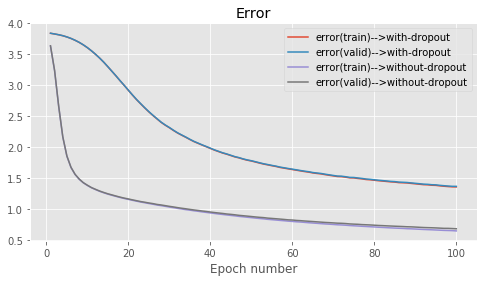

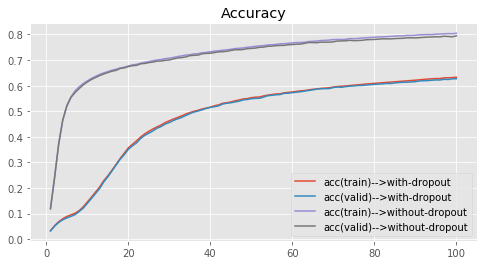

In [34]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer, StochasticLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.0025
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

#LeakyReluLayer()
model1= MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
        
        DropoutLayer(rng=rng),
        LeakyReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        DropoutLayer(rng=rng),
        LeakyReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])
model2= MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate = learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
fig_1 = plt.figure(figsize=(8, 4))
fig_2 = plt.figure(figsize=(8, 4))

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model1, error, learning_rule, train_data, valid_data, test_data, num_epochs, stats_interval, 'with-dropout', notebook=True)
print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model2, error, learning_rule, train_data, valid_data, test_data, num_epochs, stats_interval,  'without-dropout',notebook=True)

print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

fig_1.savefig('Error_with-dropout.pdf')

fig_2.savefig('ACC_without-dropout.pdf')

HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 7.9s to complete
    error(train)=6.72e-01, acc(train)=7.87e-01, error(valid)=7.00e-01, acc(valid)=7.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 6.7s to complete
    error(train)=5.70e-01, acc(train)=8.12e-01, error(valid)=6.14e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 6.7s to complete
    error(train)=5.18e-01, acc(train)=8.26e-01, error(valid)=5.73e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 7.8s to complete
    error(train)=4.81e-01, acc(train)=8.36e-01, error(valid)=5.57e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 7.7s to complete
    error(train)=4.61e-01, acc(train)=8.43e-01, error(valid)=5.46e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 7.5s to complete
    error(train)=4.34e-01, acc(train)=8.52e-01, error(valid)=5.26e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 7.3s to complete
    error(train)=4.16e-01, acc(train)=8.57e-01, error(valid)=5.18e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 6.6s to complete
    error(train)=4.11e-01, acc(train)=8.57e-01, error(valid)=5.23e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 6.4s to complete
    error(train)=4.03e-01, acc(train)=8.61e-01, error(valid)=5.31e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 6.4s to complete
    error(train)=3.89e-01, acc(train)=8.64e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 6.5s to complete
    error(train)=3.80e-01, acc(train)=8.67e-01, error(valid)=5.25e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 6.7s to complete
    error(train)=3.69e-01, acc(train)=8.72e-01, error(valid)=5.12e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 6.5s to complete
    error(train)=3.67e-01, acc(train)=8.70e-01, error(valid)=5.27e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 8.2s to complete
    error(train)=3.57e-01, acc(train)=8.74e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 7.8s to complete
    error(train)=3.59e-01, acc(train)=8.73e-01, error(valid)=5.34e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 10.9s to complete
    error(train)=3.44e-01, acc(train)=8.79e-01, error(valid)=5.25e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 7.2s to complete
    error(train)=3.45e-01, acc(train)=8.78e-01, error(valid)=5.26e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 7.0s to complete
    error(train)=3.39e-01, acc(train)=8.79e-01, error(valid)=5.31e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 8.9s to complete
    error(train)=3.33e-01, acc(train)=8.81e-01, error(valid)=5.34e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 7.2s to complete
    error(train)=3.32e-01, acc(train)=8.80e-01, error(valid)=5.42e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 9.1s to complete
    error(train)=3.26e-01, acc(train)=8.83e-01, error(valid)=5.51e-01, acc(valid)=8.31e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 7.9s to complete
    error(train)=3.21e-01, acc(train)=8.84e-01, error(valid)=5.46e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 9.0s to complete
    error(train)=3.20e-01, acc(train)=8.85e-01, error(valid)=5.52e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 8.0s to complete
    error(train)=3.14e-01, acc(train)=8.85e-01, error(valid)=5.53e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 9.6s to complete
    error(train)=3.10e-01, acc(train)=8.87e-01, error(valid)=5.51e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 9.3s to complete
    error(train)=3.07e-01, acc(train)=8.87e-01, error(valid)=5.55e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 7.9s to complete
    error(train)=3.14e-01, acc(train)=8.84e-01, error(valid)=5.70e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 8.6s to complete
    error(train)=3.08e-01, acc(train)=8.88e-01, error(valid)=5.64e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 8.8s to complete
    error(train)=2.99e-01, acc(train)=8.91e-01, error(valid)=5.50e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 9.0s to complete
    error(train)=3.01e-01, acc(train)=8.90e-01, error(valid)=5.64e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 6.7s to complete
    error(train)=2.95e-01, acc(train)=8.93e-01, error(valid)=5.70e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 8.9s to complete
    error(train)=2.93e-01, acc(train)=8.95e-01, error(valid)=5.73e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 7.1s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=5.77e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 8.7s to complete
    error(train)=2.84e-01, acc(train)=8.95e-01, error(valid)=5.73e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 6.9s to complete
    error(train)=2.87e-01, acc(train)=8.93e-01, error(valid)=5.74e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 8.5s to complete
    error(train)=2.84e-01, acc(train)=8.95e-01, error(valid)=5.92e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 8.4s to complete
    error(train)=2.80e-01, acc(train)=8.96e-01, error(valid)=5.90e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 8.4s to complete
    error(train)=2.80e-01, acc(train)=8.96e-01, error(valid)=5.86e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 8.7s to complete
    error(train)=2.78e-01, acc(train)=8.98e-01, error(valid)=5.90e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 8.7s to complete
    error(train)=2.77e-01, acc(train)=8.96e-01, error(valid)=6.09e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 8.5s to complete
    error(train)=2.75e-01, acc(train)=8.98e-01, error(valid)=6.03e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 6.7s to complete
    error(train)=2.75e-01, acc(train)=8.97e-01, error(valid)=6.09e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 6.5s to complete
    error(train)=2.71e-01, acc(train)=9.00e-01, error(valid)=6.09e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 7.1s to complete
    error(train)=2.65e-01, acc(train)=9.02e-01, error(valid)=6.01e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 6.5s to complete
    error(train)=2.67e-01, acc(train)=9.00e-01, error(valid)=6.12e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 6.2s to complete
    error(train)=2.68e-01, acc(train)=9.01e-01, error(valid)=6.18e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 6.0s to complete
    error(train)=2.72e-01, acc(train)=8.99e-01, error(valid)=6.33e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 6.7s to complete
    error(train)=2.62e-01, acc(train)=9.02e-01, error(valid)=6.27e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 8.6s to complete
    error(train)=2.61e-01, acc(train)=9.02e-01, error(valid)=6.32e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 7.5s to complete
    error(train)=2.59e-01, acc(train)=9.04e-01, error(valid)=6.23e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 6.7s to complete
    error(train)=2.57e-01, acc(train)=9.03e-01, error(valid)=6.32e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 7.1s to complete
    error(train)=2.57e-01, acc(train)=9.04e-01, error(valid)=6.40e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 6.7s to complete
    error(train)=2.59e-01, acc(train)=9.03e-01, error(valid)=6.39e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 6.6s to complete
    error(train)=2.61e-01, acc(train)=9.03e-01, error(valid)=6.50e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 7.7s to complete
    error(train)=2.55e-01, acc(train)=9.05e-01, error(valid)=6.49e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 8.1s to complete
    error(train)=2.51e-01, acc(train)=9.06e-01, error(valid)=6.37e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 6.6s to complete
    error(train)=2.52e-01, acc(train)=9.06e-01, error(valid)=6.52e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 6.1s to complete
    error(train)=2.51e-01, acc(train)=9.07e-01, error(valid)=6.64e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 6.9s to complete
    error(train)=2.50e-01, acc(train)=9.06e-01, error(valid)=6.56e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 6.1s to complete
    error(train)=2.54e-01, acc(train)=9.05e-01, error(valid)=6.68e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 6.6s to complete
    error(train)=2.51e-01, acc(train)=9.06e-01, error(valid)=6.70e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 7.3s to complete
    error(train)=2.48e-01, acc(train)=9.06e-01, error(valid)=6.69e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 6.5s to complete
    error(train)=2.52e-01, acc(train)=9.05e-01, error(valid)=6.84e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 7.2s to complete
    error(train)=2.44e-01, acc(train)=9.08e-01, error(valid)=6.71e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 7.0s to complete
    error(train)=2.42e-01, acc(train)=9.09e-01, error(valid)=6.64e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 6.1s to complete
    error(train)=2.45e-01, acc(train)=9.08e-01, error(valid)=6.77e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 5.9s to complete
    error(train)=2.44e-01, acc(train)=9.08e-01, error(valid)=6.76e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 7.2s to complete
    error(train)=2.41e-01, acc(train)=9.10e-01, error(valid)=6.74e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 6.5s to complete
    error(train)=2.46e-01, acc(train)=9.07e-01, error(valid)=6.82e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 6.2s to complete
    error(train)=2.36e-01, acc(train)=9.10e-01, error(valid)=6.83e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 7.4s to complete
    error(train)=2.36e-01, acc(train)=9.11e-01, error(valid)=6.96e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 6.9s to complete
    error(train)=2.34e-01, acc(train)=9.10e-01, error(valid)=6.94e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 6.2s to complete
    error(train)=2.39e-01, acc(train)=9.10e-01, error(valid)=6.91e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 8.8s to complete
    error(train)=2.35e-01, acc(train)=9.11e-01, error(valid)=6.91e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 9.8s to complete
    error(train)=2.35e-01, acc(train)=9.12e-01, error(valid)=6.97e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 8.9s to complete
    error(train)=2.32e-01, acc(train)=9.13e-01, error(valid)=6.92e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 7.4s to complete
    error(train)=2.35e-01, acc(train)=9.11e-01, error(valid)=7.05e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 8.2s to complete
    error(train)=2.35e-01, acc(train)=9.11e-01, error(valid)=7.06e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 7.3s to complete
    error(train)=2.27e-01, acc(train)=9.14e-01, error(valid)=7.07e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 6.6s to complete
    error(train)=2.25e-01, acc(train)=9.14e-01, error(valid)=7.07e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 6.9s to complete
    error(train)=2.29e-01, acc(train)=9.13e-01, error(valid)=7.16e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 8.5s to complete
    error(train)=2.25e-01, acc(train)=9.15e-01, error(valid)=7.20e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 6.9s to complete
    error(train)=2.28e-01, acc(train)=9.13e-01, error(valid)=7.25e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 7.6s to complete
    error(train)=2.25e-01, acc(train)=9.14e-01, error(valid)=7.33e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 8.2s to complete
    error(train)=2.31e-01, acc(train)=9.13e-01, error(valid)=7.35e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 6.5s to complete
    error(train)=2.24e-01, acc(train)=9.15e-01, error(valid)=7.31e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 8.2s to complete
    error(train)=2.26e-01, acc(train)=9.15e-01, error(valid)=7.30e-01, acc(valid)=8.18e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 8.6s to complete
    error(train)=2.24e-01, acc(train)=9.14e-01, error(valid)=7.27e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 6.6s to complete
    error(train)=2.25e-01, acc(train)=9.14e-01, error(valid)=7.50e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 7.0s to complete
    error(train)=2.26e-01, acc(train)=9.14e-01, error(valid)=7.41e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 7.7s to complete
    error(train)=2.20e-01, acc(train)=9.17e-01, error(valid)=7.37e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 7.7s to complete
    error(train)=2.21e-01, acc(train)=9.16e-01, error(valid)=7.39e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 8.1s to complete
    error(train)=2.20e-01, acc(train)=9.14e-01, error(valid)=7.48e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 6.9s to complete
    error(train)=2.19e-01, acc(train)=9.17e-01, error(valid)=7.44e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 6.0s to complete
    error(train)=2.21e-01, acc(train)=9.16e-01, error(valid)=7.50e-01, acc(valid)=8.17e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 6.9s to complete
    error(train)=2.20e-01, acc(train)=9.17e-01, error(valid)=7.48e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 7.4s to complete
    error(train)=2.14e-01, acc(train)=9.19e-01, error(valid)=7.48e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 8.9s to complete
    error(train)=2.18e-01, acc(train)=9.17e-01, error(valid)=7.63e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 6.6s to complete
    error(train)=2.13e-01, acc(train)=9.18e-01, error(valid)=7.62e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 7.8s to complete
    error(train)=2.18e-01, acc(train)=9.17e-01, error(valid)=7.66e-01, acc(valid)=8.14e-01



OrderedDict([('errortest', 0.83955767627079347), ('acctest', 0.80544303797468342)])
    final error(train) = 2.18e-01
    final error(valid) = 7.66e-01
    final acc(train)   = 9.17e-01
    final acc(valid)   = 8.14e-01
    run time per epoch = 10.30


HBox(children=(IntProgress(value=0), HTML(value='')))

HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 1: 6.2s to complete
    error(train)=6.71e-01, acc(train)=7.83e-01, error(valid)=7.11e-01, acc(valid)=7.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 2: 5.3s to complete
    error(train)=5.63e-01, acc(train)=8.12e-01, error(valid)=6.30e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 3: 5.8s to complete
    error(train)=5.06e-01, acc(train)=8.28e-01, error(valid)=5.88e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 4: 5.7s to complete
    error(train)=5.07e-01, acc(train)=8.30e-01, error(valid)=6.19e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 5: 5.7s to complete
    error(train)=4.72e-01, acc(train)=8.41e-01, error(valid)=6.10e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 6: 5.7s to complete
    error(train)=4.93e-01, acc(train)=8.35e-01, error(valid)=6.45e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 7: 5.6s to complete
    error(train)=4.87e-01, acc(train)=8.43e-01, error(valid)=6.93e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 8: 5.0s to complete
    error(train)=4.78e-01, acc(train)=8.38e-01, error(valid)=6.51e-01, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 9: 5.7s to complete
    error(train)=5.15e-01, acc(train)=8.36e-01, error(valid)=7.44e-01, acc(valid)=8.05e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 10: 5.0s to complete
    error(train)=4.80e-01, acc(train)=8.41e-01, error(valid)=7.11e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 11: 7.4s to complete
    error(train)=5.34e-01, acc(train)=8.28e-01, error(valid)=7.75e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 12: 6.4s to complete
    error(train)=5.18e-01, acc(train)=8.32e-01, error(valid)=7.63e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 13: 5.7s to complete
    error(train)=5.04e-01, acc(train)=8.34e-01, error(valid)=7.21e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 14: 6.3s to complete
    error(train)=4.98e-01, acc(train)=8.37e-01, error(valid)=7.71e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 15: 5.9s to complete
    error(train)=5.42e-01, acc(train)=8.30e-01, error(valid)=8.24e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 16: 6.1s to complete
    error(train)=5.35e-01, acc(train)=8.25e-01, error(valid)=7.48e-01, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 17: 7.7s to complete
    error(train)=5.38e-01, acc(train)=8.27e-01, error(valid)=8.17e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 18: 5.8s to complete
    error(train)=6.36e-01, acc(train)=8.15e-01, error(valid)=9.25e-01, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 19: 7.6s to complete
    error(train)=5.65e-01, acc(train)=8.32e-01, error(valid)=8.99e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 20: 7.5s to complete
    error(train)=6.03e-01, acc(train)=8.15e-01, error(valid)=8.88e-01, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 21: 5.7s to complete
    error(train)=6.36e-01, acc(train)=8.30e-01, error(valid)=1.06e+00, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 22: 5.8s to complete
    error(train)=5.43e-01, acc(train)=8.27e-01, error(valid)=7.99e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 23: 7.0s to complete
    error(train)=5.34e-01, acc(train)=8.29e-01, error(valid)=8.33e-01, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 24: 7.3s to complete
    error(train)=5.12e-01, acc(train)=8.30e-01, error(valid)=7.61e-01, acc(valid)=7.99e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 25: 7.1s to complete
    error(train)=5.30e-01, acc(train)=8.28e-01, error(valid)=7.70e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 26: 7.1s to complete
    error(train)=5.06e-01, acc(train)=8.34e-01, error(valid)=7.02e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 27: 7.4s to complete
    error(train)=4.66e-01, acc(train)=8.45e-01, error(valid)=6.53e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 28: 5.9s to complete
    error(train)=5.38e-01, acc(train)=8.25e-01, error(valid)=7.57e-01, acc(valid)=7.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 29: 5.9s to complete
    error(train)=4.69e-01, acc(train)=8.43e-01, error(valid)=6.78e-01, acc(valid)=8.12e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 30: 5.9s to complete
    error(train)=4.42e-01, acc(train)=8.51e-01, error(valid)=6.61e-01, acc(valid)=8.15e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 31: 6.0s to complete
    error(train)=4.40e-01, acc(train)=8.52e-01, error(valid)=6.42e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 32: 7.1s to complete
    error(train)=4.69e-01, acc(train)=8.44e-01, error(valid)=7.20e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 33: 6.2s to complete
    error(train)=5.30e-01, acc(train)=8.24e-01, error(valid)=7.26e-01, acc(valid)=7.93e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 34: 7.8s to complete
    error(train)=4.32e-01, acc(train)=8.56e-01, error(valid)=6.92e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 35: 11.1s to complete
    error(train)=4.69e-01, acc(train)=8.46e-01, error(valid)=7.60e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 36: 9.3s to complete
    error(train)=5.04e-01, acc(train)=8.27e-01, error(valid)=8.28e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 37: 7.5s to complete
    error(train)=4.42e-01, acc(train)=8.57e-01, error(valid)=7.88e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 38: 5.9s to complete
    error(train)=4.67e-01, acc(train)=8.50e-01, error(valid)=8.94e-01, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 39: 6.0s to complete
    error(train)=4.24e-01, acc(train)=8.58e-01, error(valid)=7.80e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 40: 5.7s to complete
    error(train)=4.41e-01, acc(train)=8.55e-01, error(valid)=8.14e-01, acc(valid)=8.14e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 41: 7.3s to complete
    error(train)=5.12e-01, acc(train)=8.42e-01, error(valid)=9.61e-01, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 42: 7.8s to complete
    error(train)=5.43e-01, acc(train)=8.19e-01, error(valid)=9.04e-01, acc(valid)=7.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 43: 8.5s to complete
    error(train)=4.81e-01, acc(train)=8.48e-01, error(valid)=8.93e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 44: 6.8s to complete
    error(train)=4.86e-01, acc(train)=8.42e-01, error(valid)=9.37e-01, acc(valid)=8.04e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 45: 10.5s to complete
    error(train)=5.36e-01, acc(train)=8.48e-01, error(valid)=1.04e+00, acc(valid)=8.09e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 46: 8.1s to complete
    error(train)=4.37e-01, acc(train)=8.54e-01, error(valid)=8.64e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 47: 7.3s to complete
    error(train)=4.72e-01, acc(train)=8.47e-01, error(valid)=9.79e-01, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 48: 8.4s to complete
    error(train)=4.83e-01, acc(train)=8.45e-01, error(valid)=9.78e-01, acc(valid)=8.07e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 49: 9.4s to complete
    error(train)=5.21e-01, acc(train)=8.47e-01, error(valid)=1.13e+00, acc(valid)=8.03e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 50: 7.1s to complete
    error(train)=6.02e-01, acc(train)=7.99e-01, error(valid)=9.63e-01, acc(valid)=7.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 51: 6.0s to complete
    error(train)=5.18e-01, acc(train)=8.48e-01, error(valid)=1.24e+00, acc(valid)=8.06e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 52: 7.0s to complete
    error(train)=4.83e-01, acc(train)=8.39e-01, error(valid)=9.03e-01, acc(valid)=7.97e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 53: 5.4s to complete
    error(train)=4.57e-01, acc(train)=8.58e-01, error(valid)=1.02e+00, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 54: 6.9s to complete
    error(train)=5.08e-01, acc(train)=8.35e-01, error(valid)=1.03e+00, acc(valid)=7.85e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 55: 5.9s to complete
    error(train)=5.22e-01, acc(train)=8.38e-01, error(valid)=1.06e+00, acc(valid)=7.95e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 56: 6.3s to complete
    error(train)=4.91e-01, acc(train)=8.43e-01, error(valid)=1.12e+00, acc(valid)=7.96e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 57: 5.9s to complete
    error(train)=5.39e-01, acc(train)=8.28e-01, error(valid)=1.13e+00, acc(valid)=7.84e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 58: 7.1s to complete
    error(train)=5.76e-01, acc(train)=8.36e-01, error(valid)=1.33e+00, acc(valid)=7.94e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 59: 5.5s to complete
    error(train)=5.59e-01, acc(train)=8.46e-01, error(valid)=1.34e+00, acc(valid)=8.01e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 60: 7.2s to complete
    error(train)=6.52e-01, acc(train)=8.52e-01, error(valid)=1.83e+00, acc(valid)=8.08e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 61: 6.2s to complete
    error(train)=5.09e-01, acc(train)=8.32e-01, error(valid)=1.11e+00, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 62: 5.6s to complete
    error(train)=5.85e-01, acc(train)=8.26e-01, error(valid)=1.26e+00, acc(valid)=7.82e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 63: 8.6s to complete
    error(train)=6.39e-01, acc(train)=8.43e-01, error(valid)=1.88e+00, acc(valid)=8.00e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 64: 5.5s to complete
    error(train)=5.55e-01, acc(train)=8.18e-01, error(valid)=1.27e+00, acc(valid)=7.76e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 65: 5.5s to complete
    error(train)=6.33e-01, acc(train)=8.32e-01, error(valid)=1.48e+00, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 66: 5.8s to complete
    error(train)=6.16e-01, acc(train)=8.35e-01, error(valid)=1.74e+00, acc(valid)=7.87e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 67: 5.9s to complete
    error(train)=6.04e-01, acc(train)=8.20e-01, error(valid)=1.35e+00, acc(valid)=7.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 68: 5.9s to complete
    error(train)=6.85e-01, acc(train)=8.30e-01, error(valid)=1.86e+00, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 69: 5.5s to complete
    error(train)=5.44e-01, acc(train)=8.33e-01, error(valid)=1.20e+00, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 70: 6.7s to complete
    error(train)=7.21e-01, acc(train)=8.33e-01, error(valid)=1.61e+00, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 71: 6.1s to complete
    error(train)=5.43e-01, acc(train)=8.34e-01, error(valid)=1.22e+00, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 72: 6.1s to complete
    error(train)=5.59e-01, acc(train)=8.48e-01, error(valid)=1.78e+00, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 73: 5.8s to complete
    error(train)=6.13e-01, acc(train)=8.18e-01, error(valid)=1.65e+00, acc(valid)=7.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 74: 6.4s to complete
    error(train)=6.90e-01, acc(train)=8.00e-01, error(valid)=1.40e+00, acc(valid)=7.60e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 75: 5.5s to complete
    error(train)=8.42e-01, acc(train)=7.82e-01, error(valid)=1.66e+00, acc(valid)=7.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 76: 5.2s to complete
    error(train)=6.17e-01, acc(train)=8.25e-01, error(valid)=1.55e+00, acc(valid)=7.79e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 77: 5.1s to complete
    error(train)=5.28e-01, acc(train)=8.32e-01, error(valid)=1.51e+00, acc(valid)=7.86e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 78: 5.9s to complete
    error(train)=7.63e-01, acc(train)=7.89e-01, error(valid)=1.66e+00, acc(valid)=7.47e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 79: 5.4s to complete
    error(train)=6.99e-01, acc(train)=8.20e-01, error(valid)=1.88e+00, acc(valid)=7.75e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 80: 6.3s to complete
    error(train)=6.11e-01, acc(train)=8.14e-01, error(valid)=1.44e+00, acc(valid)=7.67e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 81: 5.7s to complete
    error(train)=7.55e-01, acc(train)=7.93e-01, error(valid)=1.71e+00, acc(valid)=7.51e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 82: 5.6s to complete
    error(train)=6.92e-01, acc(train)=8.37e-01, error(valid)=2.52e+00, acc(valid)=7.90e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 83: 6.1s to complete
    error(train)=6.73e-01, acc(train)=8.13e-01, error(valid)=1.91e+00, acc(valid)=7.70e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 84: 5.1s to complete
    error(train)=8.56e-01, acc(train)=7.82e-01, error(valid)=1.97e+00, acc(valid)=7.39e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 85: 5.9s to complete
    error(train)=6.45e-01, acc(train)=8.24e-01, error(valid)=1.66e+00, acc(valid)=7.78e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 86: 5.6s to complete
    error(train)=7.49e-01, acc(train)=8.05e-01, error(valid)=2.14e+00, acc(valid)=7.61e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 87: 6.3s to complete
    error(train)=8.29e-01, acc(train)=8.07e-01, error(valid)=2.12e+00, acc(valid)=7.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 88: 6.0s to complete
    error(train)=5.66e-01, acc(train)=8.30e-01, error(valid)=1.74e+00, acc(valid)=7.83e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 89: 5.9s to complete
    error(train)=5.77e-01, acc(train)=8.24e-01, error(valid)=1.74e+00, acc(valid)=7.81e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 90: 5.9s to complete
    error(train)=6.66e-01, acc(train)=8.22e-01, error(valid)=2.06e+00, acc(valid)=7.80e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 91: 5.4s to complete
    error(train)=6.16e-01, acc(train)=8.41e-01, error(valid)=2.03e+00, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 92: 6.1s to complete
    error(train)=6.70e-01, acc(train)=8.32e-01, error(valid)=2.26e+00, acc(valid)=7.88e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 93: 6.8s to complete
    error(train)=7.93e-01, acc(train)=8.01e-01, error(valid)=2.23e+00, acc(valid)=7.55e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 94: 6.6s to complete
    error(train)=6.49e-01, acc(train)=8.16e-01, error(valid)=1.99e+00, acc(valid)=7.66e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 95: 6.3s to complete
    error(train)=6.64e-01, acc(train)=8.07e-01, error(valid)=2.00e+00, acc(valid)=7.64e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 96: 5.8s to complete
    error(train)=6.18e-01, acc(train)=8.26e-01, error(valid)=1.73e+00, acc(valid)=7.77e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 97: 6.4s to complete
    error(train)=6.60e-01, acc(train)=8.17e-01, error(valid)=1.51e+00, acc(valid)=7.71e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 98: 5.7s to complete
    error(train)=7.01e-01, acc(train)=7.91e-01, error(valid)=1.77e+00, acc(valid)=7.52e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 99: 5.4s to complete
    error(train)=8.28e-01, acc(train)=8.16e-01, error(valid)=2.69e+00, acc(valid)=7.74e-01


HBox(children=(IntProgress(value=0, max=1000), HTML(value='')))

Epoch 100: 6.3s to complete
    error(train)=6.72e-01, acc(train)=8.20e-01, error(valid)=1.88e+00, acc(valid)=7.74e-01



OrderedDict([('errortest', 1.6261790674175054), ('acctest', 0.76525316455696213)])
    final error(train) = 6.72e-01
    final error(valid) = 1.88e+00
    final acc(train)   = 8.20e-01
    final acc(valid)   = 7.74e-01
    run time per epoch = 8.66


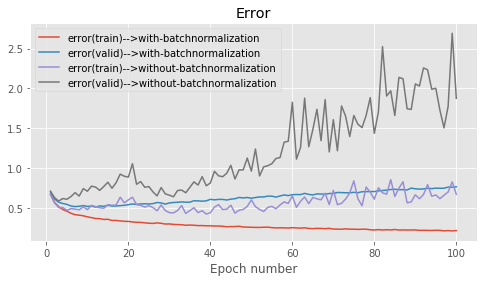

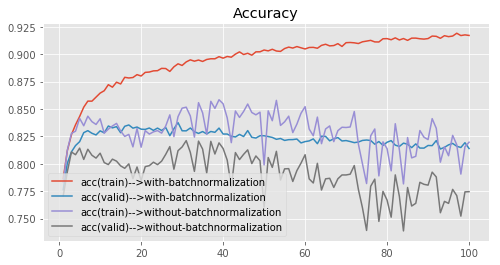

In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, ELULayer, SELULayer, StochasticLayer, BatchNormalizationLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit, SELUInit
from mlp.learning_rules import GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.0025
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

model1= MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
        
        BatchNormalizationLayer(hidden_dim),
        LeakyReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        BatchNormalizationLayer(hidden_dim),
        LeakyReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

model2= MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init),
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        
        LeakyReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])


error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = RMSPropLearningRule(learning_rate = learning_rate)

#Remember to use notebook=False when you write a script to be run in a terminal
fig_1 = plt.figure(figsize=(8, 4))
fig_2 = plt.figure(figsize=(8, 4))

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model1, error, learning_rule, train_data, valid_data, test_data, num_epochs, stats_interval, 'with-batchnormalization', notebook=True)
print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
    model2, error, learning_rule, train_data, valid_data, test_data, num_epochs, stats_interval,  'without-batchnormalization',notebook=True)

print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))

fig_1.savefig('Error_with-batchnormalization.pdf')

fig_2.savefig('ACC_without-batchnormalization.pdf')